In [1]:
import os
import warnings

import pandas as pd
import numpy as np
import scipy.integrate as integrate

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as tck

from matplotlib.ticker import MultipleLocator

In [2]:
#*ETACHA was used to extrapolate qI distribution out to a qF fraction
#^Extrapolation techinically not necessary, but MC values were not giving a consistent trend
#*1 Only 1 count, maybe run for higher stats

Be47_Z78 = {7:[1,1,1,1,1,1,1],
            6:[1,1,1,1,1,1,1],
            5:[3.11e-05,8.66e-03,4.75e-01,2.86e-02,1.42e-03,1.52e-04,5.99e-07], #MC Qf=5, 2.15e+06 total counts*
            4:[3.27e-05,9.12e-03,4.97e-01,2.97e-02,1.41e-03,1.33e-05,3.56e-08], #MC Qf=4, 2.11e+06 total counts
            3:[3.42e-05,1.01e-02,5.33e-01,2.97e-02,3.00e-04,2.26e-06,6.78e-09], #MC Qf=3, 3.54e+06 total counts
            2:[1,1,1,1,1,1,1],
            1:[1,1,1,1,1,1,1],
            0:[1,1,1,1,1,1,1]}

Be23_Z78 = {7:[1,1,1,1,1,1,1],
            6:[1,1,1,1,1,1,1],
            5:[8.99e-06,4.25e-03,3.26e-01,3.77e-02,2.96e-03,3.67e-04], #MC Qf=5, 8.35e+06 total counts
            4:[2.38e-07,5.30e-03,3.77e-01,4.00e-02,2.83e-03,2.22e-05], #MC Qf=4, 8.40e+06 total counts
            3:[1.96e-05,7.09e-03,4.59e-01,4.26e-02,3.71e-04,3.92e-06], #MC Qf=3, 8.42e+06 total counts
            2:[1,1,1,1,1,1,1],
            1:[1,1,1,1,1,1,1],
            0:[1,1,1,1,1,1,1]}

#Inconsistent trend for zmq6. Stats so low it bounces all over the place for low qF
Be47_Z77 = {7:[1,1,1,1,1,1,1],
            6:[1,1,1,1,1,1,1],
            5:[4.43e-05,1.08e-02,4.82e-01,2.51e-02,1.18e-03,1.15e-04,3.50e-07], #MC Qf=5, 2.08e+06 total counts*^
            4:[4.81e-05,1.15e-02,5.04e-01,2.59e-02,1.13e-03,3.30e-06,1.91e-08], #MC Qf=4, 2.12e+06 total counts*
            3:[6.06e-05,1.31e-02,5.19e-01,2.67e-02,2.44e-04,1.80e-06,5.04e-09], #MC Qf=3, 1.56e+07 total counts*
            2:[6.72e-05,1.49e-02,6.03e-01,1.38e-02,1.24e-04,2.40e-06,2.11e-09], #MC Qf=2, 1.25e+06 total counts*
            1:[2.97e-04,5.16e-02,4.54e-01,9.90e-03,8.63e-05,6.19e-07,9.91e-10], #MC Qf=1, 1.33e+06 total counts* (Both zmq 5&6)
            0:[3.42e-03,5.01e-02,3.73e-01,7.70e-03,6.44e-05,4.95e-07,2.24e-09]} #MC Qf=0, 1.37e+06 total counts* (Both zmq 5&6)

Be23_Z77 = {7:[1,1,1,1,1,1,1],
            6:[1,1,1,1,1,1,1],
            5:[1.92e-05,5.38e-03,3.41e-01,3.34e-02,2.49e-03,2.90e-04], #MC Qf=5, 9.35e+05 total counts
            4:[1.56e-05,6.36e-03,3.88e-01,3.61e-02,2.27e-03,1.65e-05], #MC Qf=4, 1.09e+06 total counts
            3:[2.88e-05,8.59e-03,4.68e-01,3.74e-02,3.04e-04,2.50e-06], #MC Qf=3, 8.00e+05 total counts
            2:[5.14e-05,1.38e-02,6.34e-01,1.05e-02,4.63e-05,5.27e-07], #MC Qf=2, 3.89e+05 total counts*
            1:[5.76e-04,1.03e-01,3.13e-01,4.33e-03,1.79e-05,2.24e-07], #MC Qf=1, 3.92e+05 total counts*
            0:[1.09e-02,7.82e-02,1.80e-01,2.22e-03,7.82e-06,7.62e-08]} #MC Qf=0, 3.84e+05 total counts*

Be47_Z76 = {7:[1,1,1,1,1,1,1],
            6:[1,1,1,1,1,1,1],
            5:[5.76e-05,1.33e-02,4.89e-01,2.21e-02,9.61e-04,1.24e-04], #MC Qf=5, 3.30e+05 total counts
            4:[7.52e-05,1.44e-02,5.07e-01,2.24e-02,8.93e-04,1.06e-05], #MC Qf=4, 1.04e+06 total counts
            3:[7.67e-05,1.56e-02,5.38e-01,2.24e-02,1.81e-04,7.99e-07], #MC Qf=3, 1.25e+06 total counts
            2:[9.55e-05,1.83e-02,6.00e-01,1.16e-02,8.26e-05,5.07e-07], #MC Qf=2, 6.15e+06 total counts*^
            1:[9.77e-05,6.02e-02,4.48e-01,7.89e-03,4.73e-05,3.00e-07], #MC Qf=1, 3.17e+05 total counts*
            0:[4.23e-03,5.79e-02,3.61e-01,6.27e-03,5.82e-05,2.98e-07]} #MC Qf=0, 3.09e+05 total counts*

Be23_Z76 = {7:[1,1,1,1,1,1,1],
            6:[1,1,1,1,1,1,1],
            5:[0.00e+00,6.57e-03,3.54e-01,3.04e-02,2.05e-03,2.18e-04], #MC Qf=5, 3.35e+06 total counts
            4:[2.45e-05,8.14e-03,3.98e-01,3.15e-02,1.95e-03,1.18e-05], #MC Qf=4, 1.02e+06 total counts
            3:[4.27e-05,1.04e-02,4.73e-01,3.34e-02,2.46e-04,2.51e-06], #MC Qf=3, 3.99e+05 total counts
            2:[6.85e-05,1.63e-02,6.31e-01,8.71e-03,5.34e-05,4.57e-07], #MC Qf=2, 2.19e+06 total counts
            1:[6.67e-04,1.14e-01,3.04e-01,3.52e-03,1.93e-05,0.00e+00], #MC Qf=1, 6.72e+05 total counts
            0:[1.29e-02,8.51e-02,1.71e-01,1.72e-03,1.17e-05,0.00e+00]} #MC Qf=0, 6.83e+05 total counts

Be47_Z75 = {7:[7.33e-05,1.49e-02,4.68e-01,1.85e-02,8.19e-04,5.74e-05], #MC Qf=7, 1.25e+06 total counts
            6:[1.02e-04,1.56e-02,4.78e-01,1.88e-02,8.01e-04,7.88e-05], #MC Qf=6, 1.26e+06 total counts
            5:[9.52e-05,1.63e-02,4.91e-01,1.90e-02,7.85e-04,9.05e-05], #MC Qf=5, 1.26e+06 total counts
            4:[9.06e-05,1.74e-02,5.09e-01,1.92e-02,7.36e-04,1.24e-06], #MC Qf=4, 2.42e+06 total counts
            3:[1.10e-04,1.90e-02,5.36e-01,1.94e-02,1.33e-04,5.83e-07], #MC Qf=3, 1.67e+07 total counts*^
            2:[1.43e-04,2.31e-02,5.76e-01,1.02e-02,6.23e-05,2.86e-07], #MC Qf=2, 1.73e+07 total counts*
            1:[5.09e-04,6.77e-02,4.36e-01,6.78e-03,3.42e-05,2.07e-07], #MC Qf=1, 1.45e+07 total counts
            0:[5.54e-03,7.09e-02,3.04e-01,5.74e-03,2.85e-05,1.70e-07]} #MC Qf=0, 3.28e+07 total counts*^

Be47_Z74 = {7:[5.04e-05,1.93e-02,4.84e-01,1.69e-02,7.06e-04,7.21e-05], #MC Qf=7, 1.39e+05 total counts
            6:[1.19e-04,1.90e-02,4.80e-01,1.60e-02,6.19e-04,6.94e-05], #MC Qf=6, 1.08e+06 total counts
            5:[1.18e-04,1.99e-02,4.91e-01,1.63e-02,6.39e-04,6.29e-05], #MC Qf=5, 3.98e+05 total counts
            4:[1.59e-04,2.10e-02,5.09e-01,1.69e-02,5.77e-04,3.21e-06], #MC Qf=4, 6.22e+05 total counts
            3:[1.70e-04,2.33e-02,5.24e-01,1.69e-02,9.09e-05,3.47e-07], #MC Qf=3, 1.92e+07 total counts*
            2:[2.00e-04,2.63e-02,5.89e-01,8.13e-03,4.17e-05,1.55e-07], #MC Qf=2, 1.59e+07 total counts*
            1:[6.92e-04,7.72e-02,4.24e-01,5.54e-03,2.42e-05,1.01e-07], #MC Qf=1, 1.58e+07 total counts*
            0:[6.17e-03,7.31e-02,3.37e-01,4.26e-03,1.84e-05,6.58e-08]} #MC Qf=0, 1.61e+07 total counts*

Be47_Z73 = {7:[1.85e-04,2.23e-02,4.68e-01,1.34e-02,5.54e-04,5.62e-05], #MC Qf=7, 1.25e+05 total counts
            6:[1.77e-04,2.32e-02,4.78e-01,1.36e-02,5.23e-04,6.54e-05], #MC Qf=6, 1.53e+05 total counts
            5:[1.41e-04,2.48e-02,4.87e-01,1.37e-02,5.11e-04,3.84e-05], #MC Qf=5, 1.56e+05 total counts
            4:[2.14e-04,2.54e-02,5.04e-01,1.43e-02,4.86e-04,1.10e-06], #MC Qf=4, 1.81e+06 total counts
            3:[2.47e-04,2.75e-02,5.29e-01,1.40e-02,6.77e-05,1.84e-07], #MC Qf=3, 2.33e+06 total counts*
            2:[2.74e-04,3.16e-02,5.79e-01,6.64e-03,3.68e-05,8.51e-08], #MC Qf=2, 2.42e+06 total counts*
            1:[8.99e-04,8.75e-02,4.10e-01,4.48e-03,2.60e-05,5.82e-08], #MC Qf=1, 2.39e+06 total counts*
            0:[7.31e-03,8.11e-02,3.22e-01,3.39e-03,1.26e-05,3.40e-08]} #MC Qf=0, 7.94e+05 total counts*

Be23_Z75 = {7:[1.26e-05,6.28e-03,3.07e-01,2.46e-02,1.70e-03], #MC Qf=7, 1.59e+05 total counts
            6:[1.83e-05,7.09e-03,3.31e-01,2.53e-02,1.59e-03], #MC Qf=6, 1.64e+05 total counts
            5:[4.19e-05,7.99e-03,3.63e-01,2.62e-02,1.80e-03], #MC Qf=5, 1.67e+05 total counts
            4:[4.87e-05,9.93e-03,4.07e-01,2.77e-02,1.61e-03], #MC Qf=4, 6.36e+05 total counts
            3:[5.03e-05,1.26e-02,4.79e-01,2.86e-02,1.81e-04], #MC Qf=3, 6.75e+05 total counts
            2:[8.58e-05,1.93e-02,6.25e-01,7.44e-03,3.06e-05], #MC Qf=2, 6.87e+05 total counts
            1:[9.26e-04,1.26e-01,2.95e-01,2.82e-03,1.54e-05], #MC Qf=1, 4.55e+05 total counts
            0:[1.56e-02,9.18e-02,1.61e-01,1.50e-03,1.00e-05]} #MC Qf=0, 4.98e+05 total counts

Be23_Z74 = {7:[3.01e-05,8.24e-03,3.49e-01,2.31e-02,1.48e-03], #MC Qf=7, 1.66e+05 total counts
            6:[4.58e-05,8.83e-03,3.43e-01,2.26e-02,1.38e-03], #MC Qf=6, 1.51e+06 total counts
            5:[6.12e-05,9.94e-03,3.70e-01,2.32e-02,1.38e-03], #MC Qf=5, 5.56e+05 total counts
            4:[2.61e-05,1.21e-02,4.12e-01,2.44e-02,1.26e-03], #MC Qf=4, 3.07e+05 total counts
            3:[8.98e-05,1.57e-02,4.81e-01,2.43e-02,1.57e-04], #MC Qf=3, 1.34e+05 total counts
            2:[1.59e-04,2.26e-02,6.17e-01,6.15e-03,2.69e-05], #MC Qf=2, 4.09e+05 total counts
            1:[1.19e-03,1.39e-01,2.83e-01,2.50e-03,6.53e-06], #MC Qf=1, 4.60e+05 total counts
            0:[1.84e-02,9.93e-02,1.52e-01,1.20e-03,8.80e-06]} #MC Qf=0, 4.54e+05 total counts

Be23_Z73 = {7:[4.02e-05,9.58e-03,3.25e-01,1.93e-02,1.15e-03], #MC Qf=7, 1.74e+05 total counts
            6:[6.08e-05,1.06e-02,3.48e-01,1.92e-02,1.14e-03], #MC Qf=6, 1.65e+05 total counts
            5:[9.12e-05,1.27e-02,3.75e-01,2.00e-02,1.07e-03], #MC Qf=5, 1.86e+05 total counts
            4:[5.93e-05,1.46e-02,4.16e-01,2.09e-02,1.11e-03], #MC Qf=4, 2.19e+05 total counts
            3:[1.20e-04,1.85e-02,4.79e-01,2.16e-02,7.70e-05], #MC Qf=3, 2.34e+05 total counts
            2:[2.16e-04,2.67e-02,6.08e-01,4.96e-03,2.07e-05], #MC Qf=2, 2.41e+05 total counts
            1:[1.52e-03,1.52e-01,2.70e-01,2.01e-03,4.25e-06], #MC Qf=1, 2.12e+06 total counts
            0:[2.15e-02,1.07e-01,1.42e-01,9.32e-04,1.90e-06]} #MC Qf=0, 2.11e+06 total counts

Be47_Z72 = {7:[1,1,1,1,1,1,1],
            6:[1,1,1,1,1,1,1],
            5:[2.65e-04,2.97e-02,4.84e-01,1.19e-02,3.88e-04,3.21e-05], #MC Qf=5, 3.74e+05 total counts
            4:[3.27e-04,3.06e-02,4.98e-01,1.21e-02,3.50e-04,2.32e-06], #MC Qf=4, 2.16e+06 total counts
            3:[4.01e-04,3.38e-02,5.21e-01,1.17e-02,6.16e-05,3.85e-06], #MC Qf=3, 2.60e+05 total counts
            2:[4.45e-04,4.26e-02,5.13e-01,6.12e-03,2.56e-05,1.22e-07], #MC Qf=2, 2.46e+07 total counts
            1:[1.25e-03,9.92e-02,3.93e-01,3.64e-03,2.01e-05,3.36e-09], #MC Qf=1, 1.04e+06 total counts* 
            0:[9.22e-03,9.22e-02,3.06e-01,2.67e-03,1.45e-05,2.88e-09]} #MC Qf=0, 1.09e+06 total counts*


Be23_Z72 = {7:[1,1,1,1,1,1,1],
            6:[1,1,1,1,1,1,1],
            5:[9.80e-05,1.50e-02,3.79e-01,1.76e-02,9.16e-04], #MC Qf=5, 2.58e+06 total counts
            4:[7.98e-05,1.77e-02,4.15e-01,1.88e-02,8.71e-04], #MC Qf=4, 1.38e+05 total counts
            3:[2.29e-04,2.20e-02,4.74e-01,1.88e-02,6.08e-05], #MC Qf=3, 2.14e+05 total counts
            2:[2.94e-04,3.45e-02,5.53e-01,4.65e-03,1.81e-05], #MC Qf=2, 2.82e+07 total counts
            1:[2.23e-03,1.65e-01,2.57e-01,1.38e-03,0.00e+00], #MC Qf=1, 3.63e+04 total counts
            0:[2.60e-02,1.13e-01,1.32e-01,6.46e-04,0.00e+00]} #MC Qf=0, 1.36e+05 total counts


Be47_Z71 = {7:[1,1,1,1,1,1,1],
            6:[1,1,1,1,1,1,1],
            5:[4.26e-04,3.53e-02,4.73e-01,1.01e-02,3.56e-04], #MC Qf=5, 1.86e+05 total counts
            4:[4.07e-04,3.70e-02,4.87e-01,1.03e-02,2.87e-04], #MC Qf=4, 8.43e+05 total counts
            3:[4.67e-04,3.96e-02,5.08e-01,1.01e-02,4.81e-05], #MC Qf=3, 4.37e+05 total counts
            2:[6.14e-04,4.58e-02,5.48e-01,4.02e-03,2.08e-05], #MC Qf=2, 9.61e+04 total counts
            1:[1.59e-03,1.12e-01,3.76e-01,2.78e-03,1.25e-05], #MC Qf=1, 1.29e+05 total counts*
            0:[1.10e-02,1.00e-01,2.89e-01,2.32e-03,8.78e-06]} #MC Qf=0, 1.42e+05 total counts*

Be23_Z71 = {7:[1,1,1,1,1,1,1],
            6:[1,1,1,1,1,1,1],
            5:[1.47e-04,1.85e-02,3.79e-01], #MC Qf=5, 2.42e+06 total counts
            4:[2.19e-04,2.08e-02,4.14e-01], #MC Qf=4, 6.36e+05 total counts
            3:[2.78e-04,2.66e-02,4.71e-01], #MC Qf=3, 1.11e+05 total counts
            2:[3.88e-04,3.68e-02,5.78e-01], #MC Qf=2, 5.15e+04 total counts
            1:[2.67e-03,1.87e-01,2.41e-01], #MC Qf=1, 4.05e+04 total counts
            0:[3.02e-02,1.24e-01,1.22e-01]} #MC Qf=0, 4.38e+04 total counts

Be47_Z70 = {7:[1,1,1,1,1,1,1],
            6:[1,1,1,1,1,1,1],
            5:[7.18e-04,4.27e-02,4.62e-01,8.53e-03], #MC Qf=5, 1.25e+05 total counts
            4:[7.59e-04,4.33e-02,4.74e-01,8.42e-03], #MC Qf=4, 1.41e+05 total counts
            3:[7.40e-04,4.74e-02,4.91e-01,8.24e-03], #MC Qf=3, 4.43e+05 total counts
            2:[8.08e-04,5.31e-02,5.28e-01,3.53e-03], #MC Qf=2, 1.26e+05 total counts
            1:[2.26e-03,1.25e-01,3.54e-01,2.32e-03], #MC Qf=1, 1.42e+05 total counts
            0:[1.32e-02,1.12e-01,2.71e-01,1.67e-03]} #MC Qf=0, 1.57e+05 total counts

def get_params(setname):
    params = {'set':None,'targ':0,'beam':0}

    pBe = 9012.2   #mg/mol
    pNi = 58934    #mg/mol
    Av = 6.022E23  #Avacados
    tBe1 = 21.8    #mg/cm^2 thickness for D2 and D3
    tBe2 = 50.15   #mg/cm^2 thickness for all other Be only runs
    tNi = 22.7     #mg/cm^2
    
    # Accurate Coulomb integration from CRAD06
    beam = {'D2':  4931511619651,
            'D3a': 756684086167,   #Applied Att 3
            'D3b': 435961683885,   #Applied Att 100
            'D4a': 71810084458186,
            'D4b': 158387926601815,
            'D5':  207295659165975,
            'D6a1':42765745130662,
            'D6a2':16914299997452,
            'D6a3':112666756489762,
            'D6b': 267823620514323,
            'D7a': 622620825166817,
            'D7b': 299550317479013,
            'D8':  124091372963283,
            'D9':  302163016341752}
        
#     beam = {'D2': 6.4830e13,  #Rough time integration of current
#             'D3a': 2.6525e12,'D3b' : 1.2793e12,
#             'D4a': 2.6706e13,'D4b': 1.2686e12,
#             'D5': 3.2467e14,
#             'D6a1': 7.4028e13,'D6a2': 3.1298e13,
#             'D6a3': 1.6990e14,'D6b': 3.5612e14,
#             'D7a': 5.9790e14,'D7b': 3.9318e14,
#             'D8': 1.6010e14,'D9': 4.9241e14}

    try:
        params['beam'] = beam[setname]
    except KeyError:
        print(f'Invalid data set key: {setname}')
        return None
        
    if setname == 'D2' or setname=='D3a' or setname=='D3b': #Set target factor
        params['targ'] = tBe1*Av/pBe
    elif setname == 'D4a' or setname == 'D4b' or setname == 'D6b' or setname == 'D8':
        params['targ'] = tNi*Av/pNi
    else:
        params['targ'] = tBe2*Av/pBe
        
    params['set'] = setname
    
    return params

In [3]:
#For Transmission
def get_res_files(dname):
    """
    Recursively collect all results files within a directory and creates a dictionary of df.read_csv
    
    This also contains the division of qtrans values
    """
    
    cwd = f'I:\projects\e15130\CS\Transmissions\\{dname}'
    Dict={}
    for root, dirs, files in os.walk(cwd, topdown=False):
        params = dirs
        for name in files:
            if 'res' in name:
                p = os.path.join(root, name)
                name = name.replace('.res4','')
                if debug:
                    print('Path creation: ',p) #for debugging
                df = pd.read_csv(p,sep='\t')
                #df = df.drop(index=0)
                df.loc[1:,f'{name}_Trans/q_All %']=(df.loc[1:,'Trans,%'].astype(float)/
                                                    (df.loc[1:,'q_All-trans%'].astype(float)/100))
                df.loc[1:,f'{name}_Trans/q_Last %']=(df.loc[1:,'Trans,%'].astype(float)/
                                                     (df.loc[1:,'q[L]-trans'].astype(float)/100))
                ind=[]
                for i in df.index:
                    ind.append(df.loc[i,' Z '].replace(' ','')+df.loc[i,' A ']+df.loc[i,' q[last] '].replace(' ',''))
                df.index = ind
                df = df.drop(index=df.index[0])
                df = df.rename(columns={'Trans,%':f'{name}_Trans,%'})
                df = df.rename(columns={'q[L]-trans':f'{name}_q[L]-trans'})
                df = df.rename(columns={'q_All-trans%':f'{name}_q_All-trans%'})
                Dict[name]=df
    return Dict

def clean_na(Dict,opt=0):
    """
    Condenses and cleans res files
    
    1) Condense to just transmission via the global 'o' variable
    'Trans,%','Trans/q_All %','Trans/q_Last %'
    
    2) Clean Nan's (aka 0) from result
    Opt=0 -> Replace zero trans with order mag smaller than min
    Opt=1 -> Replace zero trans with order mag smaller than mode (Drop isotopes w/ main=0)
    """
    
    trans = [Dict[d][f'{d}_{o}'] for d in Dict]
    df = pd.concat(trans,axis=1)
    df = df.astype(float)
    OG = df.shape[0]
    
    if opt == 0:
        for i in df.index:
            df.loc[i] = df.loc[i].fillna(df.loc[i].min()*.1) #Replace zero trans with 1 order-mag. smaller than min

    if opt == 1:
        print(f'Total isotopes possible: {OG}')
        print(f'Isotopes with 0% transmission possible in any setting: {OG-df.dropna().shape[0]}')
        for i in df.index:
            df.loc[i] = df.loc[i].fillna(df.loc[i]['main_Trans,%']*.1) #Replace zero trans with order mag smaller than mode
        df = df.dropna() #If transmission doesn't occur in main, we drop the isotope
        print(f'Isotopes with 0% transmission in the main (mode) setting {OG-df.shape[0]} @@@ REMOVED @@@')
        print(f'Final remaining isotopes: {df.shape[0]}')
    
    
    return df

def sqP(df):
    """
    Calculates avg val and err

    Assumes the trans-PDF for each parameter is a flat sq.
    Final answer has symmetric error. Calc from variance
    """
    df = df.drop(columns=f'main_{o}') #All values between min and max for each param are equally likely
    
    df = np.log10(df) 
    logmean = df.mean(axis=1)
    logvar = df.var(axis=1,ddof=0) #ddof=0 for var.p, default(=1) for var.s in excel
    linmean = 10**logmean
    linHI = 10**(logmean+logvar)-10**logmean
    linLO = 10**logmean-10**(logmean-logvar)
    new_df = pd.concat([linmean,linHI,linLO],axis=1)
    new_df.columns = [o,'Err+','Err-']
    return new_df

def maxerr(df):
    """
    Returns error bars as simply the max and min transmission of all values
    Val. is the mode
    """
    new_df = pd.concat([df[f'main_{o}'],
                    df.max(axis=1)-df[f'main_{o}'],
                    df[f'main_{o}']-df.min(axis=1)],
                   axis=1)

    new_df.columns = [o,'Err+','Err-']
    for i in new_df.index:
        if new_df.loc[i,'Err-'] == 0:
            new_df.loc[i,'Err-'] = new_df.loc[i,o]*.9
    
    return new_df

def calcXS(Dset,o,tErr='max',yErr=1):
    """
    Calculate cross section for a data set with a given charge state option
    
    Resulting DataFrame can be filtered with the following syntax:
    data[(data['Z'] == 75) & (data['q'] == 71)]
    (This will give you rows with only Z75 and q71)
    
    tErr: method for transmission error calc, sq or max
    yErr: background count estimation
    """
    #@@@@@@@@@@@@#
    mag=1 #Arbitrary err- amplification if counts below background
    #@@@@@@@@@@@@#
    
    print(f'Beginning {Dset}')
#     print(f'Extracting {o} from res files...')
    Dict = get_res_files(Dset)
    params=get_params(Dset)

#     print(f'Calculating transmission with error...')
    transAll = clean_na(Dict) #Trans for all varied params, min and max
    if tErr == 'max':
#         print("   *Using Min and Max for trans err")
        transOne = maxerr(transAll)
    else:
#         print("   *Using square PDFs for trans err")
        transOne = sqP(transAll)

# 
    print(f'Concatenating yields and transmission frames...')
    yield_path = f'Yields/results/{Dset}/{Dset}_yields.xlsx'
    yields = pd.read_excel(yield_path,sheet_name='base',index_col=0)
    transOne.index = transOne.index.astype(int)
    data = pd.concat([yields,transOne],axis=1)
    data = data.dropna()
    print(f'   *Yields measured: {yields.shape[0]} isotopes')
    print(f'   *Transmissions predicted via LISE++: {transOne.shape[0]} isotopes')
    print(f'   *Overlap retained: {data.shape[0]} isotopes')

#     print(f'Calcuating Cross Sections...\n\n')
    data.insert(0,'Dset',[Dset for i in range(data.shape[0])])
    data.insert(data.shape[1],'CS',1e27*data['Yield']/((data[o]/100)*params['targ']*params['beam']))
    data.insert(data.shape[1],'CS-',data['CS']-1e27*data['Yield']/((data[o]+data['Err+'])/100*params['targ']*params['beam']))
    data.insert(data.shape[1],'CS+',-data['CS']+1e27*data['Yield']/((data[o]-data['Err-'])/100*params['targ']*params['beam']))
    
    newCSm = data['CS-']*np.sqrt(((BKGD*data[o])/(data['Yield']*data['Err+']))**2+1)
    for i in newCSm.index:
        if newCSm.loc[i]/data.loc[i,'CS'] > 1:
    #         print('\n',newCSm.loc[i]/data.loc[i,'CS'])
            newCSm.loc[i] = data.loc[i,'CS']*(1-1/10**mag)+data.loc[i,'CS-']/10**mag
    #         print(newCSm.loc[i]/data.loc[i,'CS'])
    #         print(data.loc[i,'CS-']/data.loc[i,'CS'])
        elif data.loc[i,'CS-'] == 0:
            frac = yErr/data.loc[i,'Yield']
            if frac > 1:
                newCSm.loc[i] = data.loc[i,'CS']*.99
            else:
                newCSm.loc[i] = data.loc[i,'CS']*frac

    if data[data['Err-'] == 0].shape[0] > 0: #When trans Err- = 0 because NO transmission for main settings, main = min
        for i in data[data['Err-'] == 0].index:
            #A moderately neglible 10% trans error bar for this case @@@WARNING: Completely adhoc, may affect result
            data.loc[i,'Err-'] = data.loc[i,o]*.1
    newCSp = data['CS+']*np.sqrt(((BKGD*data[o])/(data['Yield']*data['Err-']))**2+1)
    data['CS+'] = newCSp
    data['CS-'] = newCSm
    
    return data

def bigQ(qF,xsAll):
    """Apply charge state fractions to all data"""
    mod = xsAll.copy()
    NUMind = mod.index
    mod.index = mod.index.astype(str)+mod['Dset'] #Every measurement gets a unique index

    for D in sorted(set(mod['Dset'])):
#         print(D)
        for Z in sorted(set(mod[mod['Dset'] == D]['Z'])):
#             print(Z)
            for zmq in sorted(set(mod[(mod['Dset'] == D) & (mod['Z'] == Z)]['Z-q'])):
#                 print(zmq)
                if D in ['D2','D3a','D3b']:
                    inds = mod[(mod['Dset'] == D) & (mod['Z'] == Z) & (mod['Z-q'] == zmq)].index
#                     print(mod.loc[inds,['CS','CS+','CS-']])
                    exec(f"mod.loc[inds,['CS','CS+','CS-']]/=Be23_Z{int(Z)}[{qF}][{int(zmq)}]")
#                     print(mod.loc[inds,['CS','CS+','CS-']])
                elif D in ['D6a1','D6a2','D6a3','D7a','D7b']:
                    inds = mod[(mod['Dset'] == D) & (mod['Z'] == Z) & (mod['Z-q'] == zmq)].index
                    exec(f"mod.loc[inds,['CS','CS+','CS-']]/=Be47_Z{int(Z)}[{qF}][{int(zmq)}]")

    mod.index = NUMind
    return mod

In [4]:
def S_analytic(group):
    """Oleg's Error Analysis v4 analytic error averaging method.
    
    Requires column format: 'CS','Err-','Err+','Wt'
    """
    
    if debug:
        print(group)
    
    meanA = (group['CS']*group['Wt']).sum()/group['Wt'].sum()
    group['amp'] = group['Wt']/np.sqrt(2*np.pi)/(group['Err+']+group['Err-'])*2

    SumXW = (group['amp']*group['Err-']*group['Err-']).sum()
    SumW = group['amp'].sum()
    Count = group['amp'].count()

    sigmaASL = SigL(meanA,list(group['CS']),list(group['Wt']))
    sigmaASR = SigR(meanA,list(group['CS']),list(group['Wt']))

    SumXW = (group['amp']*group['Err-']*group['Err-']).sum()
    SumW = group['amp'].sum()
    Count = group['amp'].count()
    sigmaLt = np.sqrt(SumXW/SumW/Count)

    SumXW = (group['amp']*group['Err+']*group['Err+']).sum()
    SumW = group['amp'].sum()
    Count = group['amp'].count()
    sigmaRt = np.sqrt(SumXW/SumW/Count)

    sigmaLA = np.sqrt(sigmaASL**2+sigmaLt**2)
    sigmaRA = np.sqrt(sigmaASR**2+sigmaRt**2)

#     print(sigmaASL,sigmaASR)
#     print(sigmaLt,sigmaRt)
#     print(meanA,sigmaLA,sigmaRA)

    return [meanA,sigmaLA,sigmaRA,group['Wt'].sum()]

In [5]:
def Gauss_Asym(xMesh,Xpeak,sigma,asym,amp):
    t = sigma
    if t == 0:
        t = 1
    
    if asym > .99:
        print('Very Asymmetric! (Fix Code: Gauss_Asym)')
    if asym < -.99:
        print('Very Asymmetric! (Fix Code: Gauss_Asym)')
    
    delta = xMesh-Xpeak
    tGrid = np.where(delta > 0,t*(1-asym),t*(1+asym))
    
    return amp*np.exp(-delta*delta/2/tGrid/tGrid)

def S_Med(X,Y):
    area = np.trapz(Y,X) #Trapezoid integration
    areaHalf = area/2
    areaHalf*=0.95 #avoid a hole

    areaL=0
    areaR=0

    for i in range(len(X)-1):
        H = np.abs(X[i+1]-X[i])
        seg = (Y[i]+Y[i+1])/2*H

        if areaL+seg < areaHalf:
            areaL+=seg
        else:
            xL = X[i]
            break

    for i in reversed(range(len(X)-1)):
        H = np.abs(X[i+1]-X[i])
        seg = (Y[i]+Y[i+1])/2*H

        if areaR+seg < areaHalf:
            areaR+=seg
        else:
            xR = X[i]
            break
    
    if debug:
        print(f"""S_Med Debug
        X-Left: {round(xL,3)}, Left Area: {round(areaL,4)}
        X-Right: {round(xR,3)}, Right Area: {round(areaR,4)}
        Median: {round((xL+xR)/2,3)}""")

    return (xL+xR)/2

def S_Mean(X,Y):
    if len(X) > 0 and len(X) == len(Y):
        sumY=0
        mean=0
        for i in range(len(X)):
            sumY+=Y[i]
            mean+=(Y[i]*X[i])
        mean/=sumY
    else:
        raise ValueError('X and Y lengths do not match, or X is empty')
    return mean


def SigL(mean,X,Y):
    if len(X) > 0 and len(X) == len(Y):
        sumY=0
        sigL=0
        for i in range(len(X)):
            dx = mean - X[i]
            if dx >=0 :
                sumY+=Y[i]
                sigL+=Y[i]*dx*dx
        sigL = np.sqrt(sigL/(sumY/2))
    else:
        raise ValueError('X and Y lengths do not match, or X is empty')
    return sigL

def SigR(mean,X,Y):
    if len(X) > 0 and len(X) == len(Y):
        sumY=0
        sigR=0
        for i in range(len(X)):
            dx = mean - X[i]
            if dx <=0 :
                sumY+=Y[i]
                sigR+=Y[i]*dx*dx
        sigR = np.sqrt(sigR/sumY)
    else:
        raise ValueError('X and Y lengths do not match, or X is empty')
    return sigR

def SigR(mean,X,Y):
    if len(X) > 0 and len(X) == len(Y):
        sumY=0
        sigR=0
        for i in range(len(X)):
            dx = mean - X[i]
            sumY+=Y[i]
            if dx <=0 :
                sigR+=Y[i]*dx*dx
        sigR = np.sqrt(sigR/(sumY/2))
    else:
        raise ValueError('X and Y lengths do not match, or X is empty')
    return sigR

def SigL(mean,X,Y):
    if len(X) > 0 and len(X) == len(Y):
        sumY=0
        sigL=0
        for i in range(len(X)):
            dx = mean - X[i]
            sumY+=Y[i]
            if dx >=0 :
                sigL+=Y[i]*dx*dx
        sigL = np.sqrt(sigL/(sumY/2))
    else:
        raise ValueError('X and Y lengths do not match, or X is empty')
    return sigL

def Sig(mean,X,Y):
    """Notice how the X values are the indices to the Y array"""
    if len(X) > 0 and len(X) == len(Y):
        sumY=0
        sig=0
        for i in range(len(X)):
            dx = mean - X[i]
            sumY+=Y[i]
            sig+=Y[i]*dx*dx
        sig = np.sqrt(sig/sumY)
    else:
        raise ValueError('X and Y lengths do not match, or X is empty')
    return sig

def ProbConv(xMesh,group):
    resGrid = pd.DataFrame(index=xMesh)
    for i in group.index:
        npG = Gauss_Asym(xMesh,group.loc[i,'CS'],group.loc[i,'sig'],group.loc[i,'asym'],group.loc[i,'amp'])
        resGrid.insert(resGrid.shape[1],f'Ion: {i}',npG)
        if debug:
            plt.plot(xMesh,npG,label=f'Ion: {i}')
    resGrid.insert(resGrid.shape[1],'Sum',resGrid.sum(axis=1))
    if debug:
        plt.plot(xMesh,resGrid['Sum'])

    area=group['weight'].sum()

    X,Y=resGrid.index,list(resGrid['Sum'])
    m = S_Mean(X,Y)
    s = Sig(m,X,Y)
    amp = area/np.sqrt(2*np.pi)/s
    resDF = group.append(pd.Series([m,s,s,s,0,amp,area],index=group.columns,name='Symmetric'))

    c = S_Med(X,Y)
    l = SigL(c,X,Y)
    r = SigR(c,X,Y)
    sA = (l+r)/2
    ampA = area/np.sqrt(2*np.pi)/sA
    asymA = l/sA-1
    resDF = resDF.append(pd.Series([c,l,r,sA,asymA,ampA,area],index=group.columns,name='Asymmetric'))

    for i in ['Symmetric','Asymmetric']:
        npG = Gauss_Asym(xMesh,resDF.loc[i,'CS'],resDF.loc[i,'sig'],resDF.loc[i,'asym'],resDF.loc[i,'amp'])
        resGrid.insert(resGrid.shape[1],i,npG)
        if debug:
            plt.plot(xMesh,npG,label=i)
    if debug:
        plt.legend(loc='upper right')

    return resDF,resGrid

def errAvg(data,log=True,err='quad',wt='sq',sym=False,debug=False):
    """Takes a collection of XS measurements with error bars and provides an avg value with errors
    
    data: DataFrame with columns 'CS','CS-','CS+'
        *if data has symmetric error bars, make two extra columns then pass in
    err: can be 'quad', 'max', 'gauss', 'lytc'
        *if quad, error simply added in quadrature and normalized (error reduced with more points: statistical)
        *if max, error is simply max and min (error not correlated with # of points: systematic)
    wt: can be 'sq', 'lin', 'perc', or 'cust'
        *IF CUSTOM: data must have 'Wt' column
        
    returns the following: ['CS','Err-','Err+','weight']
    """
    convert_dict = {'CS':float,'CS-':float,'CS+':float}
    data = data.astype(convert_dict)
    if debug:
        print(f'Params for errAvg: log={log}, err={err}, wt={wt}, sym={sym}')
        
    if log:
        group = pd.concat([np.log10(data['CS']),
                           np.log10(data['CS'])-np.log10(data['CS']-data['CS-']),
                           np.log10(data['CS']+data['CS+'])-np.log10(data['CS'])],
                           axis=1)
        group.columns=['CS','Err-','Err+']
    else:
        group = data.copy()
    
    #Used in weights and gauss
    sig = (group['Err-']+group['Err+'])/2
    
    ### Weights ###
    if wt == 'sq':
        symW = 1/sig**2 #Avg errbars to make a sigma, then 1/sig^2
    elif wt == 'lin':
        symW = 1/(group['Err-']+group['Err+']) #1/err, the width of the error bars
    elif wt == 'perc':
        #Wt inspired by percentages
        #Average contributions from neg and pos error bar
        #Symmetric contributions are obtained from multiples of the main value (ie. 10 +40/-8, yields 1/4 weight from both)
        #May as well be called 'exp' or 'mult' due to outcome above
        symW = ((group['CS']-group['Err-'])/group['Err-']+group['CS']/group['Err+'])/2
    elif wt == 'cust':
        symW = data['Wt']
    if debug:
        print(f'\nWeights set:\n{symW}')
    ### @@@@@@@ ###

    if err == 'quad':
        errpls = np.sqrt(sum(group['Err+']**2))/group.shape[0]
        errmin = np.sqrt(sum(group['Err-']**2))/group.shape[0]
        val = sum(group['CS']*symW)/(sum(symW))
        res = [val,errmin,errpls,sum(symW)]
        if debug:
            print(f'Quad res: {res}')
    elif err == 'max':
        val = sum(group['CS']*symW)/(sum(symW))
        top = group['CS']+group['Err+']
        bot = group['CS']-group['Err-']
        errmin = val - bot.min()
        errpls = top.max() - val
        res = [val,errmin,errpls,symW]
        if debug:
            print(f'Max res: {res}')
    elif err == 'gauss':
        if wt != 'cust':
            symW = [1 for i in group.index]
        group.insert(group.shape[1],'sig',sig)
        group.insert(group.shape[1],'asym',(group['Err-']/sig-1))
        group.insert(group.shape[1],'amp',symW/np.sqrt(2*np.pi)/sig)
        group.insert(group.shape[1],'weight',symW)
        
        top = (group['CS']+group['Err+']*3).max() #sig edge
        if log:
            bot = (group['CS']-group['Err-']*3).min() #sig edge
        else:
            bot = ((group['CS']-group['Err-'])*.01).min() #Cant have negative XS
        
        minSig = group[['Err-','Err+']].min().min()
        step = minSig/3 #sig res
#         step = 0.0643 #for matching purposes with Oleg code
        steps = round((top-bot)/step)
        
        if log:
            xMesh = np.linspace(bot,top,steps) #Take log data to lin, use linspace
        else:
            xMesh = np.logspace(bot,top,1000) #Idk how to do the steps for this
        if debug:
            print(f'xMesh step: {np.abs(round(xMesh[0]-xMesh[1],3))}')

        resDF,resGrid = ProbConv(xMesh,group)
        if debug:
            print(f'\n\nresDF: \n{resDF}')
        
        if sym:
            res = list(resDF.loc['Symmetric',['CS','Err-','Err+','weight']])
        else:
            res = list(resDF.loc['Asymmetric',['CS','Err-','Err+','weight']])
    
    elif err == 'lytc':
        group['Wt'] = data['Wt']
#         group.columns=['CS','CS-','CS+','Wt']
        res = S_analytic(group)

    else:
        raise ValueError('Invalid err option')
        
    if log:
        lin = 10**res[0]
        res[1] = lin-10**(res[0]-res[1])
        res[2] = 10**(res[0]+res[2])-lin
        res[0]=lin

    return res

In [ ]:
#For transmission debugging
options = ['Trans,%','Trans/q_All %','Trans/q_Last %']

## Set ##
Dset = 'D3b'
ion = '7720175'
o=options[0]
## @@@ ##

Dict = get_res_files(Dset)
transAll = clean_na(Dict)
print(transAll.loc[ion])

In [ ]:
#For error debugging
Z=74; A = 191; q = 4; dset = 'D6a3'
debug = True
COF=True
PAX=True
xsMod = xsMod_All[qF]

plt.figure(1,figsize=(18,9))
plt.subplot(1,2,1)
plotXS_charge(xsMod[(xsMod['Dset'] == dset) & (xsMod['Z'] == Z)],dset)

#### Two Points ####
group = xsMod[(xsMod['Dset'] == dset) & (xsMod['Z'] == Z)]
df = group[group['A'] == A].copy()

#### Three Points ####
# D6a = xsMod[(xsMod['Dset'] == 'D6a1') | (xsMod['Dset'] == 'D6a2') | (xsMod['Dset'] == 'D6a3')]
# df = D6a[(D6a['A'] == A) & (D6a['Z'] == Z) & (D6a['Z-q'] == q)].copy()
# df.index = df.index.astype(str)+df['Dset']

#These two objects are very useful for debugging but you have to get them out of the errAvg func to see them
# xMesh,pair = errAvg(df,err='gauss',debug=True)
# resDF,resGrid = ProbConv(xMesh,pair)
# resDF

plt.subplot(1,2,2)
res = errAvg(df,err='gauss',debug=True,wt='cust')
res

In [6]:
def Avgset(Dset,name):
    """Averages groups of duplicate indices

    DataFrame requires these columns: Z, A, q, Z-q, A-3q, CS, CS-, CS+, Dset, Wt, qF
    """
    global group
    Dset_avg=pd.DataFrame(columns=['Z','A','q','Z-q','A-3q','CS','CS-','CS+','Wt','qF'])
    for i in sorted(set(Dset.index)):
        group = Dset.loc[i]
        if len(group.shape) == 1:
            ans = group[['Z','A','q','Z-q','A-3q','CS','CS-','CS+','Wt','qF']] #One of a kind ion doesn't need to be avgd
            ans = ans.to_frame().T
        else:
            NUMind = group.index
            group.index = group.index.astype(str)+group['Dset']
            
            # print(group.dtypes)
            CS = errAvg(group,err=ERR,sym=SYM,wt='cust')
            
            group.index = NUMind
            
            CS = pd.DataFrame(CS,index=['CS','CS-','CS+','Wt'],columns=[i]).T #Labeling and formatting
            ans = pd.concat([group[['Z','A','q','Z-q','A-3q','qF']][:1],CS],axis=1) #Including data for plotting
        
        Dset_avg = pd.concat([Dset_avg,ans])
    Dset_avg.insert(0,'Dset',[name for i in range(Dset_avg.shape[0])])
    return Dset_avg

def Avgstates(setty):
    """Average charge states together"""
    
    dfAvg = pd.DataFrame(columns=['Dset','Z','A','CS','CS-','CS+','Wt','qF'])
    setty.index = setty['Z'].astype(int).astype(str)+setty['A'].astype(int).astype(str)
    
    for i in sorted(set(setty.index)):
        group = setty.loc[i]
        if isinstance(group,pd.core.frame.DataFrame):
            ans = errAvg(group,err=ERR,wt='cust')
            CS = pd.DataFrame(ans,index=['CS','CS-','CS+','Wt'],columns=[i]).T #Labeling and formatting
            ans = pd.concat([group[['Dset','Z','A']][:1],CS],axis=1)    #Including data for plotting
            ans['qF']=group['qF'][:1]
        else:
            ans = group.drop(['A-3q','Z-q','q'])
            ans = ans.to_frame().T
        dfAvg = pd.concat([dfAvg,ans])

    return dfAvg

In [7]:
SHIFT=False

def plotXS(data,Z,name,color='blue'):
    """Plots no-frills CS plots
    
    data needs columns [A, Z, CS, CS-, CS+]
    data needs to be in linear form
    
    !!!This is where the normalizaton is calculated
    
    DON'T HAVE LINE AND SHIFT TRUE AT SAME TIME
    """
    if LINE:
        assert SHIFT == False
    elif SHIFT:
        assert LINE == False
    
    data = data[data['Z'] == Z] #If its not already filtered
    try:
        setname = data.name
    except AttributeError:
        setname = name
        data.name = name


    conv_dict = {'CS':float,'CS-':float,'CS+':float}
    data = data.astype(conv_dict)
    
    df = pd.concat(lin2log(data['CS'],data['CS-'],data['CS+']),axis=1)
    df.columns=['CS','Err-','Err+']
    avgErr = round(df[['Err-','Err+']].sum().sum()/df.shape[0],3)
    
    plt.errorbar(data['A'],data['CS'],np.array(data[['CS-','CS+']].T),
                 fmt='o', linewidth=2, capsize=6, color=color, label=f" CS (TotErr={avgErr})")
    
    if PAX:
        EPAX3 = pd.read_excel('XS/EPAX3_Be.xlsx',index_col=0)
        e3 = EPAX3[int(Z)]
        eChi = round(logchi(data,Z,EPAX3,WTD=WTD),3)
        plt.plot(e3.index,list(e3),label=f'EPAX3: {eChi}',linestyle='dashdot',color='black')
        
    if COF and Z != 78:
        COFRA = pd.read_excel('XS/COFRA.xlsx',index_col=0)
        cf = COFRA[int(Z)]
        cf = cf.loc[:(120+Z)] #Cofra doesn't do pickup reactions, its only fragmentation
        cChi = round(logchi(data[data['A'] < Z+120],Z,COFRA),3)
        plt.plot(cf.index,list(cf),label=f'COFRA: {cChi}',linestyle='dashdot',color='darkgreen')
        
        if LINE:
            Adom = data[data['A']<=(120+Z)]['A'].astype(int) #Viable domain of masses for COFRA
            line = [cf[Adom].max() for c in cf] #Take max value for cutoff line
#             print(f"##DEBUG## -> A domain: {Adom} || Cutoff Val: {line[0]}")
            plt.plot(cf.index,line,label=f'Cutoff: {line[0]} mb',linestyle='solid',linewidth=5,color='firebrick')
            cuterr=0
            for c in data['CS']:
                if c > line[0]:
                    cuterr+=np.log10(c/line[0])
#             print(f"Cut off error: {cuterr} || Z{Z} qF{QF}")
            RES.append({'Z':Z,'qF':QF,'Cut':cuterr,'Err':avgErr})
            

    if SHIFT:
#         print(f'Calculating normalization for {MOD}')
#         print(f"QF in plotXS: {QF}")
        normDict = normer(data,MOD)
        NORM = normDict['Norm Factor']
        nChi = normDict['Norm Chi']
        normDict['Avg Err'] = avgErr
        normDict['Dset'] = DSET
        RES.append(normDict)
        if MOD == 'epax':        
#             print('In epax, Norm&Chi:',NORM, nChi)
            plt.plot(e3.index,list(e3*NORM),label=f'EPAX3->({NORM}:{nChi})',linestyle='dashdot',color='gold')
        elif MOD == 'cofra' and Z!=78:
#             print('In cofra, Norm&Chi:',NORM, nChi)
            plt.plot(cf.index,list(cf*NORM),label=f'COFRA->({NORM}:{nChi})',linestyle='dashdot',color='gold')
        elif MOD == 'bok':
            BOK = pd.read_excel('XS/BOK.xlsx',index_col=0)
            bk = BOK[int(Z)]
            bChi = round(logchi(data,Z,BOK,WTD=WTD),3)
            plt.plot(bk.index,list(bk),label=f'BOK: {bChi}',linestyle='dashdot',color='orange')
            plt.plot(bk.index,list(bk*NORM),label=f'BOK->({NORM}:{nChi})',linestyle='dashdot',color='gold')



    plt.yscale('log')
    plt.ylim(top=data['CS'].max()*10,bottom=data['CS'].min()*.1)
    plt.xlim(right=data['A'].max()+.5,left=data['A'].min()-.5)
    
    plt.legend(loc='lower left')

    plt.title(name)
    plt.xlabel('A')
    plt.ylabel('CS (mbar)')
    
def plotXS_charge(df,name):
    """Plot an element with all its charge states
    
    df needs [A, Z, q, Z-q, CS, CS-, CS+] columns
    """
    
    colors = {1:'b',2:'g',3:'r',4:'c',5:'m',6:'y',7:'k'}
    for q in set(df['q']):
        qset = df[df['q'] == q]
        zmq = qset['Z-q'].iloc[0]
        plt.errorbar(qset['A'],qset['CS'],np.array(qset[['CS-','CS+']].T),
                     fmt='o', label=f"Z-q={int(zmq)}", linewidth=2, capsize=6,color=colors[zmq])
    
    Z = df['Z'].iloc[0]
    EPAX3 = pd.read_excel('XS/EPAX3_Be.xlsx',index_col=0)
    e3 = EPAX3[int(Z)]
    eChi = round(logchi(df,Z,EPAX3),3)

    if COF == True and Z != 78:
        COFRA = pd.read_excel('XS/COFRA.xlsx',index_col=0)
        cf = COFRA[int(Z)]
        cf = cf.loc[:(120+Z)]
        cChi = round(logchi(df[df['A'] < Z+120],Z,COFRA),3)
        plt.plot(cf.index,list(cf),label=f'COFRA: {cChi}',linestyle='dashdot',color='darkgreen')

    if PAX:
        plt.plot(e3.index,list(e3),label=f'EPAX3: {eChi}',linestyle='dashdot',color='black')

    plt.title(name)

    top = df['CS'].max()*10
    bot = df['CS'].min()*.1
    if eChi > 1.5:
        top *= 10
        bot *= .1
    plt.ylim(top=top,bottom=bot)
    plt.xlim(right=df['A'].max()+.5,left=df['A'].min()-.5)
    plt.yscale('log')
    plt.legend(loc='upper right')
    plt.xlabel('A')
    plt.ylabel('CS (mb)')

def plotMultiQ(var,xs,has_states=True):
    """Main loop for big picture plots
    
    has_states: Choose to plot XS with or without charge states
    """
    global QF
    pairs = [(70,0),(70,1),(70,2),(70,3),(70,4),(70,5),
             (71,0),(71,1),(71,2),(71,3),(71,4),(71,5),
             (72,0),(72,1),(72,2),(72,3),(72,4),(72,5),
             (73,0),(73,1),(73,2),(73,3),(73,4),(73,5),(73,6),(73,7),
             (74,0),(74,1),(74,2),(74,3),(74,4),(74,5),(74,6),(74,7),
             (75,0),(75,1),(75,2),(75,3),(75,4),(75,5),(75,6),(75,7),
             (76,0),(76,1),(76,2),(76,3),(76,4),(76,5),
             (77,0),(77,1),(77,2),(77,3),(77,4),(77,5),
             (78,3),(78,4),(78,5)]
    k=1

    if var == 'sets':
        plt.figure(figsize=(22,11))
        for d in sorted(set(xs['Dset'])):
            if (Z,QF) in pairs:
                plt.subplot(2,4,k)
                if has_states:
                    plotXS_charge(xs[xs['Dset'] == d],f"Data Set {d} || Z = {Z} || qF = {QF}")
                else:
                    plotXS(xs[xs['Dset'] == d],Z,f"Data Set {d} || Z = {Z} || qF = {QF}")
                k+=1
            else:
                print(f"No charge state fraction for Z,qF pair {Z,QF} ")
                k+=1

    elif var == 'Z':
        plt.figure(figsize=(18,18))
        for z in sorted(set(xs['Z'])):
            if (z,QF) in pairs:
                plt.subplot(3,3,k)
                if has_states:
                    plotXS_charge(xs[xs['Z'] == z],f"Data Set {DSET} || Z = {z} || qF = {QF}")
                else:
                    plotXS(xs[xs['Z'] == z],z,f"Data Set {DSET} || Z = {z} || qF = {QF}")
                k+=1
            else:
                print(f"No charge state fraction for Z,qF pair {z,QF} ")
                k+=1

    elif var == 'qF':
        plt.figure(figsize=(24,12))
        for q in set(xs['qF']):
            QF = q
#             print(f"QF in plutMultiQ: {QF}")
            if (Z,q) in pairs:
                plt.subplot(2,4,k)
                if has_states:
                    plotXS_charge(xs[xs['qF'] == q],f"Data Set {DSET} || Z = {Z} || qF = {q}")
                else:
                    plotXS(xs[xs['qF'] == q],Z,f"Set {DSET} || Z = {Z} || qF = {q}")
                k+=1
            else:
#                 print(f"No charge state fraction for Z,qF pair {Z,q} ")
                k+=1

In [8]:
def lin2log(md,mn,mx):
    MD = np.log10(md)
    MN = MD-np.log10(md-mn)
    MX = np.log10(md+mx)-MD
    return [MD,MN,MX]
def log2lin(MD,MN,MX):
    md = 10**MD
    mn = md-10**(MD-MN)
    mx = 10**(MD+MX)-md
    return md,mn,mx

def logchi(data,Z,EPAX3,debug=False,norm=1,WTD=False):
    """Average log difference, weighted by log err"""
    
#     print(WTD)
    convert_dict = {'CS':float,'CS-':float,'CS+':float}
    data = data.astype(convert_dict)
    
    group = data[data['Z'] == Z]
    group = group.sort_values(by=['A'])
    group.index = group['A'] #So that you can operate with EPAX and GROUP df's
    EPAX = EPAX3.loc[group['A'],Z]
    
    EPAX *= norm #A global kind of normalization, to help match shape over proximity to epax

    logEPAX = np.log10(EPAX)
    logXS = pd.concat([np.log10(group['CS']),
                       np.log10(group['CS'])-np.log10(group['CS']-group['CS-']),
                       np.log10(group['CS']+group['CS+'])-np.log10(group['CS'])],
                       axis=1)
    logXS.columns=['CS','CS-','CS+']

#     w = 1/((logXS['CS-']+logXS['CS+'])/2)**2
    w = group['CS']*(1/group['CS+']+1/group['CS-'])
#     w = (group['CS']*(1/group['CS+']+1/group['CS-']))**1.71
    chi = np.abs(logXS['CS']-logEPAX)#/np.abs(logEPAX)

    #For debug
    if debug:
        df = pd.concat([w,logXS[['CS','CS-','CS+']],logEPAX,chi],axis=1) 
        df.columns=['weight','logCS','CS-','CS+','logEPAX','chi']
        print(f'{["@" for i in range(20)]}\n\nZ = {Z}\n',df[['logCS','CS-','CS+','weight','chi']])

    if WTD:
        return sum(chi*w)/sum(w)
    else:
        return sum(chi)/len(chi)


def obj(x,*args):
    return logchi(args[0], args[1], args[2], WTD=args[3], norm=x)

def normer(xsplt,mod):
    """Normalizes the data to a given model"""
#     print(f"QF in normer: {QF}")
    
    if mod == 'epax':
        EPAX3 = pd.read_excel('XS/EPAX3_Be.xlsx',index_col=0)
        chi = round(logchi(xsplt,Z,EPAX3),3)
        res = opt.minimize(obj, 1, args=(xsplt,Z,EPAX3,WTD), method='Nelder-Mead', bounds=(.0001,10000))
        new_chi = round(res.fun,3)
        NORM = round(res.x[0],3)
    elif mod == 'cofra' and Z != 78:
        COFRA = pd.read_excel('XS/COFRA.xlsx',index_col=0)
        chi = round(logchi(xsplt,Z,COFRA),3) 
        res = opt.minimize(obj, 1, args=(xsplt[xsplt['A'] < Z+120],Z,COFRA,WTD), method='Nelder-Mead', bounds=(.0001,10000))
        new_chi = round(res.fun,3)
        NORM = round(res.x[0],3)
    elif mod == 'bok':
        BOK = pd.read_excel('XS/BOK.xlsx',index_col=0)
        chi = round(logchi(xsplt,Z,BOK),3)
        res = opt.minimize(obj, 1, args=(xsplt,Z,BOK,WTD), method='Nelder-Mead', bounds=(.0001,10000))
        new_chi = round(res.fun,3)
        NORM = round(res.x[0],3)
    else:
        return {'Set':xsplt.name,'Z':Z,'qF':QF,'Chi':0,'Norm Factor':0,'Norm Chi':0}

    return {'Set':xsplt.name,'Z':Z,'qF':QF,'Chi':chi,'Norm Factor':NORM,'Norm Chi':new_chi}

def variance(Aset,log=True,wtd=False,mean='arth'):
    """Calculates variance of a collection of cross sections
    
    Needs dataframe with CS, CS-, CS+ columns
    
    ###Options###
    log: work in log or linear scale
    mean: set as 'arth' or 'geom' for an arithmetic or geometric mean when calc log=False
    wtd: receive back an additional weight for that variance if needed
    """
    if log:
        df = pd.concat([np.log10(Aset['CS']),
                           np.log10(Aset['CS'])-np.log10(Aset['CS']-Aset['CS-']),
                           np.log10(Aset['CS']+Aset['CS+'])-np.log10(Aset['CS'])],
                           axis=1)
        df.columns=['CS','CS-','CS+']
        mean = df['CS'].sum()/df['CS'].count()

    else:
        df = Aset
        if mean == 'geom':
            mean = np.exp(np.log(df['CS']).sum()/df['CS'].count()) #geometric mean
        else:
            mean = df['CS'].sum()/df['CS'].count() #Arithmetic
        
    var = sum((df['CS']-mean)**2)/(df['CS'].count()-1)
    
    if wtd == False:
        return var
    else:
        sig = (df['CS-']+df['CS+'])/2 #Sigma per point
        w = 1/np.sqrt(sum(sig**2)) #SUMSQ SQRT, inverted for weight
        return var,w

In [9]:
time_wt = {'D2':  33.79, 'D3a': 1.838, 'D3b': 206.8, #Not currently in use
           'D4a': 22.14, 'D4b': 464.9, 'D5':  489.7,
           'D6a1':108.5, 'D6a2':55.06, 'D6a3':280.2,
           'D6b': 433.3, 'D7a': 559.1, 'D7b': 433.6,
           'D8':  127.9, 'D9':  460.5}
EPAX3 = pd.read_excel('XS/EPAX3_Be.xlsx',index_col=0)
COFRA = pd.read_excel('XS/COFRA.xlsx',index_col=0)

# Dsets = ['D4b'] #Ni w/ Wedge
# Dsets = ['D5','D9'] #Be w/ Wedge    #Can't run because transmissions are not calculated
# Dsets = ['D4a','D6b','D8'] #Ni
Dsets = ['D2','D3a','D3b','D6a1','D6a2','D6a3','D7a','D7b'] #Be
options = ['Trans,%','Trans/q_All %','Trans/q_Last %']
BKGD = 5 #Background counts to be subtracted and factored into error
debug=False

o=options[1]
qF = 'None'

#Construct a Master df for all xs in a related set
# xsAllsq = pd.concat([calcXS(D,o) for D in Dsets],axis=0)
xsAll = pd.concat([calcXS(D,o,tErr='max',yErr=BKGD) for D in Dsets],axis=0)

####################################################################
### ~~~~~~~~~~~~~~~~~~~~ Preliminary Filters ~~~~~~~~~~~~~~~~~~~ ###
####################################################################
xsAll = xsAll[xsAll['A']-xsAll['Z']<122] #Pickup reaction filter (pickup past A-Z=120)
xsAll = xsAll.drop(index=list(set(xsAll[(xsAll['Z'] == 78) & (xsAll['A'] == 198)].index))) #Beam itself doesn't have XS

xsAll = xsAll.drop([7117967,7218067,7318368,7418669]) #Filter out low mass isotopes exclusively found in thick target data

xsAll['oldInd'] = xsAll.index
xsAll.index = xsAll.index.astype(str)+xsAll['Dset']
xsAll = xsAll.drop(['7518971D6a1','7518971D6a3']) #Specifically filter out low mass isotopes from specific data set
xsAll.index = list(xsAll['oldInd'])
xsAll = xsAll.drop(columns=['oldInd'])

####################################################################
### ~~~~~~~~~ Apply q-state fractions to all isotopes ~~~~~~~~~~ ###
####################################################################
print('Applying q-state fractions')
xsQF_All={}
for qF in [0,1,2,3,4,5,6,7]:
    xsQF = bigQ(qF,xsAll)
    xsQF['qF'] = qF
    xsQF_All[qF] = xsQF

####################################################################
### ~~~~~~~~~~~~~ Average Subsets into Larger Sets ~~~~~~~~~~~~~ ###
####################################################################
ERR = 'lytc' #Err avg method: quad, max, gauss, lytc (I don't think quad and max work right now)
SYM = False
debug = False

xsQF_Avg={}
for qF in [0,1,2,3,4,5,6,7]:
    print(f'Averaging subset for qF={qF}')
    xsQF = xsQF_All[qF].copy()
    xsQF['Wt'] = 1/np.abs(np.log10(xsQF['Trans/q_All %']/100))

    # NUMind = xsQF.index
    # xsQF.index = xsQF.index.astype(str)+xsQF['Dset'] #Every measurement gets a unique index

    D2 = xsQF[xsQF['Dset'] == 'D2']
    D2 = D2.drop(['Yield',o,'Err+','Err-'],axis=1)
    D3 = xsQF[xsQF['Dset'] == 'D3b']
    D3 = D3.drop(['Yield',o,'Err+','Err-'],axis=1)
    D3['Dset']='D3'
    # D3 = Avgset(xsQF[(xsQF['Dset'] == 'D3a') | 
    #                   (xsQF['Dset'] == 'D3b')],'D3')
    D6a = Avgset(xsQF[(xsQF['Dset'] == 'D6a1') |
                       (xsQF['Dset'] == 'D6a2') |
                       (xsQF['Dset'] == 'D6a3')],'D6a')
    D7 = Avgset(xsQF[(xsQF['Dset'] == 'D7a') |
                      (xsQF['Dset'] == 'D7b')],'D7')
    thin = Avgset(pd.concat([D2,D3]),'thin')
    thick = Avgset(pd.concat([D7,D6a]),'thick')
    
    xsAvg = pd.concat([D2,D3,D6a,D7,thin,thick])
    xsAvg['qF'] = qF
    xsQF_Avg[qF]=xsAvg

# xsMod.index = NUMind

####################################################################
### ~~~~~~~~~~~~~~ Average Charge States Together ~~~~~~~~~~~~~~ ###
####################################################################
xsFin_All={}
ERR='lytc'

for qF in xsQF_Avg:
    print(f'Averaging charge states for qF={qF}')
    xsFin=pd.DataFrame(columns=['Dset','Z','A','CS','CS-','CS+','Wt','qF'])
    QFdf = xsQF_Avg[qF]
    for D in set(QFdf['Dset']):
        setty = QFdf[QFdf['Dset'] == D]
        res = Avgstates(setty)
        xsFin = pd.concat([xsFin,res])
    xsFin_All[qF]=xsFin

Beginning D2
Concatenating yields and transmission frames...
   *Yields measured: 68 isotopes
   *Transmissions predicted via LISE++: 268 isotopes
   *Overlap retained: 67 isotopes
Beginning D3a
Concatenating yields and transmission frames...
   *Yields measured: 34 isotopes
   *Transmissions predicted via LISE++: 255 isotopes
   *Overlap retained: 33 isotopes
Beginning D3b
Concatenating yields and transmission frames...
   *Yields measured: 73 isotopes
   *Transmissions predicted via LISE++: 347 isotopes
   *Overlap retained: 73 isotopes
Beginning D6a1
Concatenating yields and transmission frames...
   *Yields measured: 82 isotopes
   *Transmissions predicted via LISE++: 371 isotopes
   *Overlap retained: 82 isotopes
Beginning D6a2
Concatenating yields and transmission frames...
   *Yields measured: 78 isotopes
   *Transmissions predicted via LISE++: 369 isotopes
   *Overlap retained: 78 isotopes
Beginning D6a3
Concatenating yields and transmission frames...
   *Yields measured: 72 is

In [10]:
# xsQF_All[3]
# xsQF_Avg[3]
# xsFin_All[3]
xsQF_All[3].shape,xsQF_Avg[3].shape,xsFin_All[3].shape

((536, 14), (505, 11), (350, 8))

##################################################### Beginning Set D7a, Z75 #####################################################


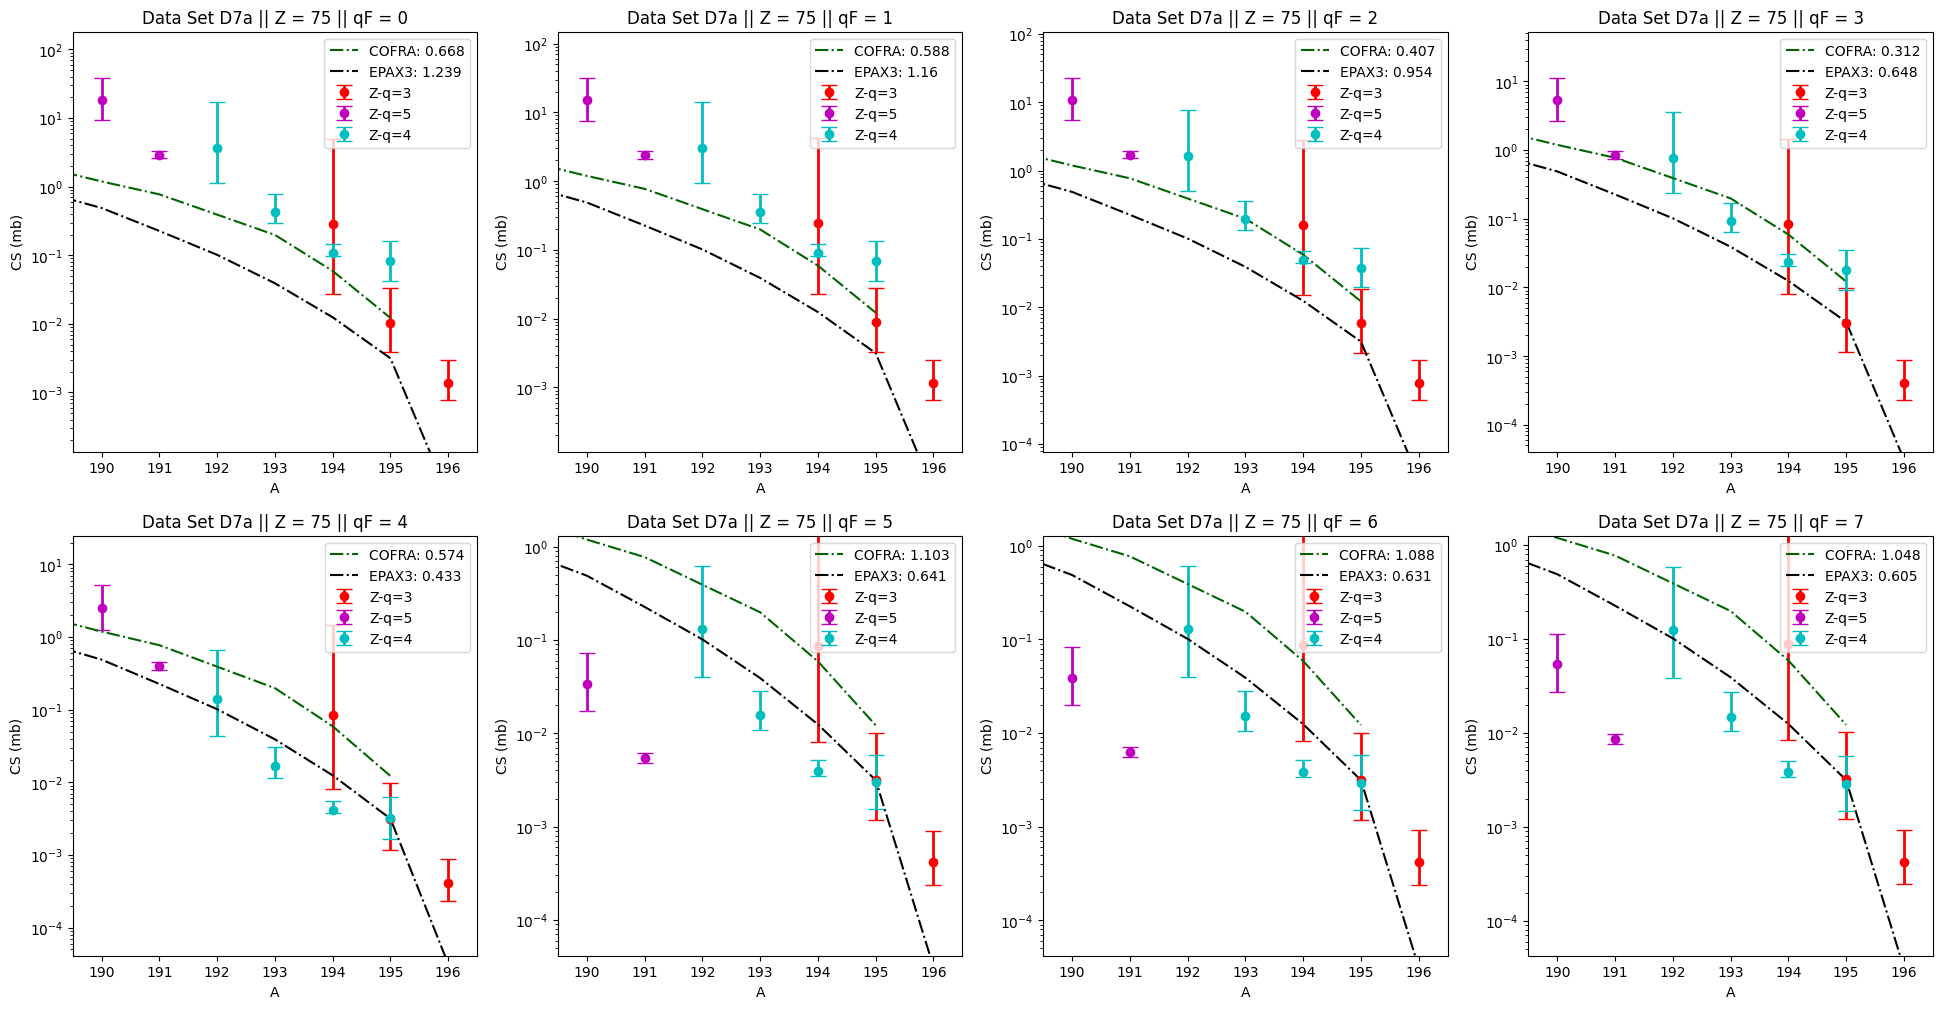

##################################################### Beginning Set D7b, Z75 #####################################################


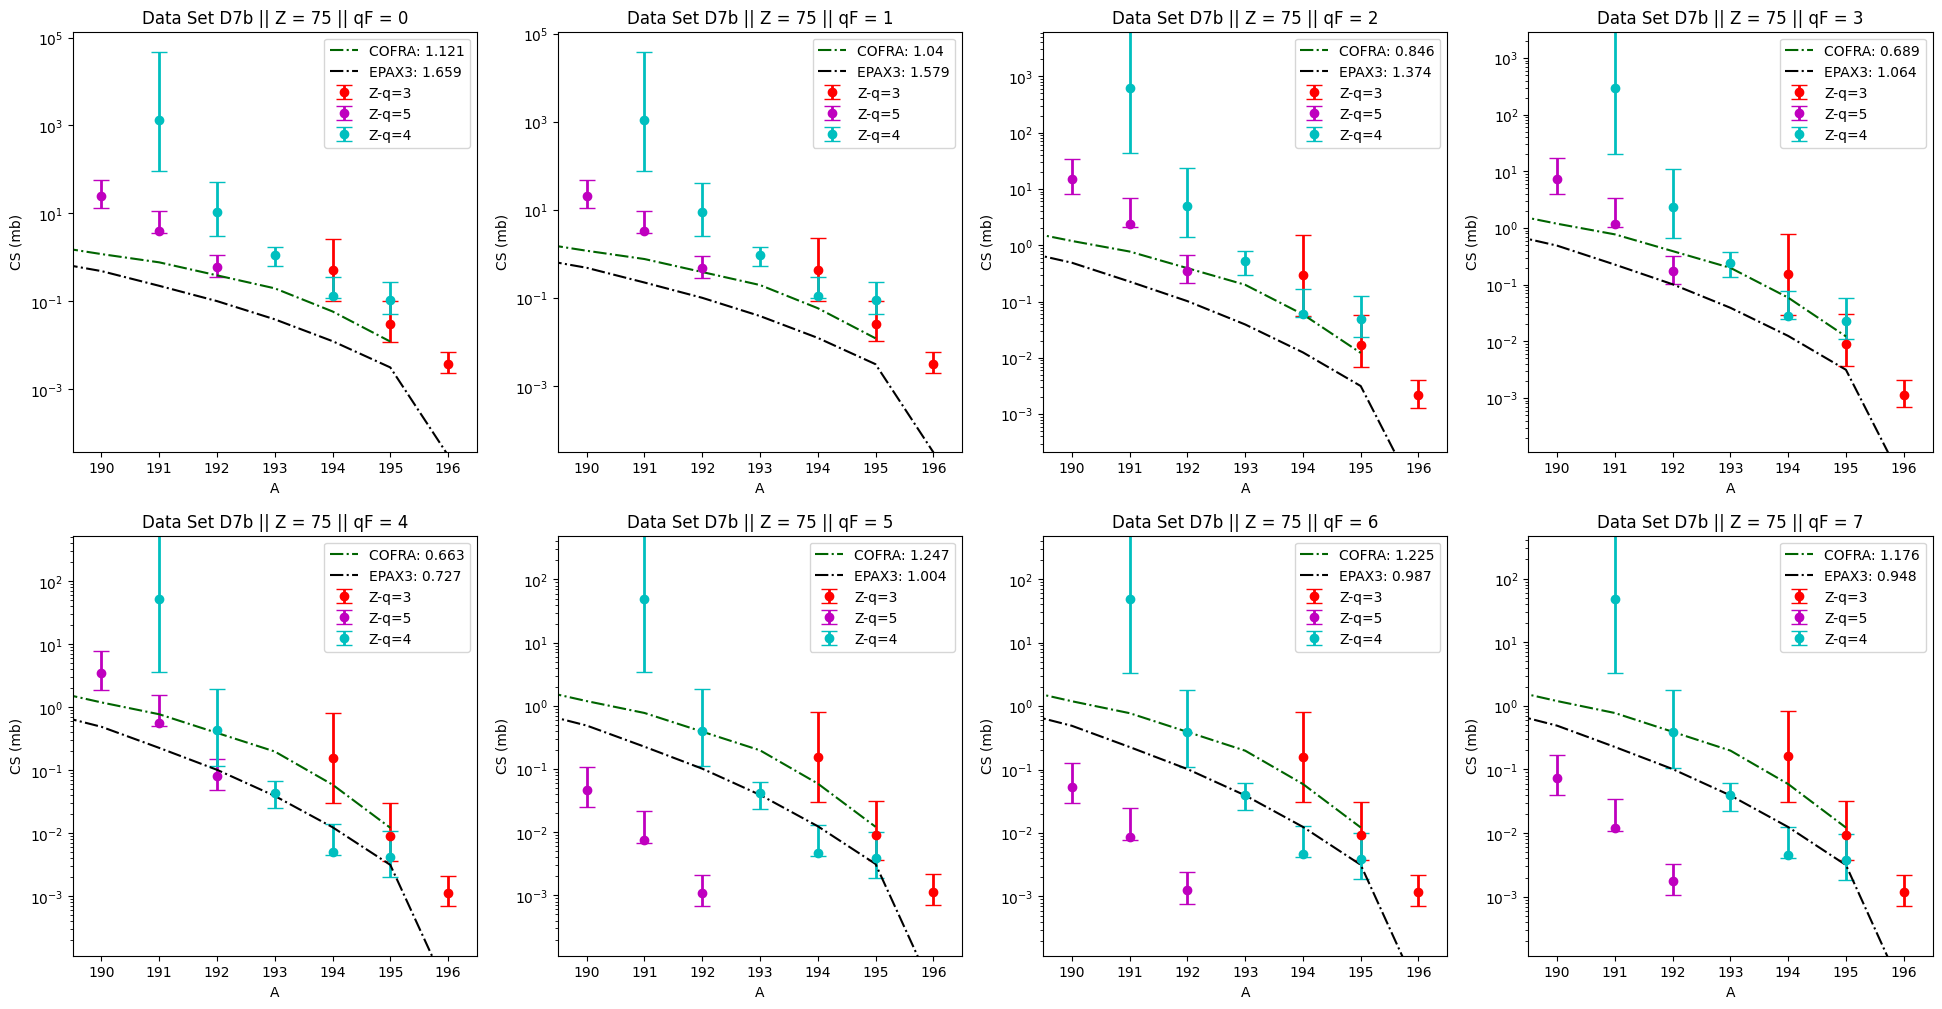

In [11]:
#######################
##### ALL SUBSETS #####
#######################
#You can comment out the loops and inspect a single graph or generate bulk graphs in any viewable format

COF = True #Trigger to plot COFRA xs line
PAX = True #Trigger to plot EPAX xs line
SAV = False #Trigger to save and close plots

#3 Params, 2 fixed, 1 varies.
var = 'qF';      Z = 75; DSET = 'D7b'
# var = 'Z';       QF = 3; DSET = 'D3b'
# var = 'sets';    QF = 3; Z = 77

# @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@ #

for DSET in ['D7a','D7b']:
# for DSET in ['D2','D3a','D3b']:
# for DSET in ['D6a1','D6a2','D6a3','D7a','D7b']:
# for DSET in ['D2','D3a','D3b','D6a1','D6a2','D6a3','D7a','D7b']:

# for Z in [70,71,72,73,74,75,76,77,78]:
#     for Z in [70,71,72,76,77]:

# for QF in [0,1,2,3,4,5,6,7]:
# for QF in [0,1,2]:

#For observing flow of loops
    print(f"##################################################### Beginning Set {DSET}, Z{Z} #####################################################")
# print(f"Beginning Set {DSET}, qF{QF}")
# print(f"Beginning qF{QF}, Z{Z}")

    if var == 'qF':
        xsplt = pd.concat([xsQF_All[qF][(xsQF_All[qF]['Z'] == Z) & (xsQF_All[qF]['Dset'] == DSET)] for qF in xsQF_All])
        plotMultiQ(var,xsplt)
        if SAV:
            plt.savefig(f'All_{var}_Z{Z}_set{DSET}.png')
            plt.close()
    elif var == 'Z':
        xsplt = xsQF_All[QF][xsQF_All[QF]['Dset'] == DSET]
        plotMultiQ(var,xsplt)
        if SAV:
            plt.savefig(f'All_{var}_qF{QF}_set{DSET}.png')
            plt.close()
    elif var == 'sets':
        xsplt = xsQF_All[QF][xsQF_All[QF]['Z'] == Z]
        plotMultiQ(var,xsplt)
        if SAV:
            plt.savefig(f'All_{var}_qF{QF}_Z{Z}.png')
            plt.close()
    plt.show()

Beginning Set D7, Z75


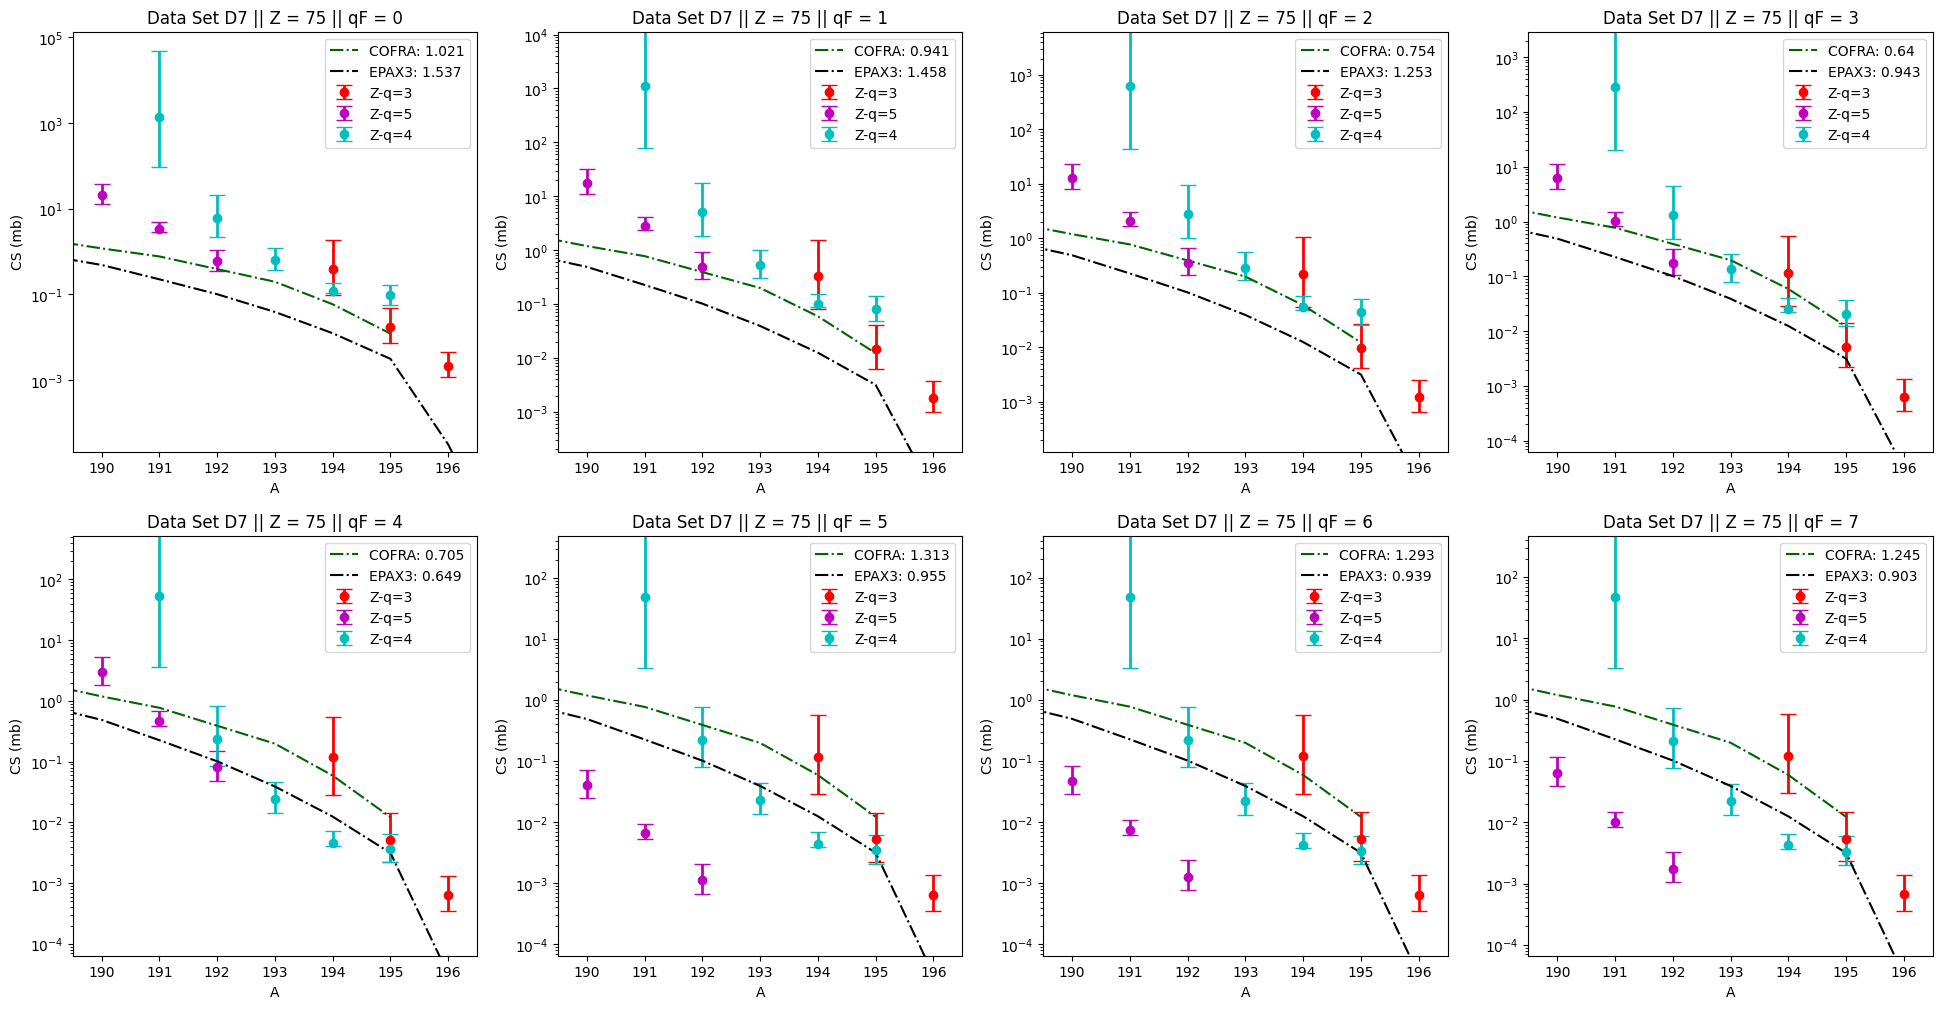

In [12]:
#########################
##### AVERAGED SETS #####
#########################
#You can comment out the loops and inspect a single graph or generate bulk graphs in any viewable format

plt.rcdefaults()

COF = True #Trigger to plot COFRA xs line
PAX = True #Trigger to plot EPAX xs line
SAV = False #Trigger to save and close plots

#3 Params, 2 fixed, 1 varies.
var = 'qF';      Z = 75; DSET = 'D7'
# var = 'Z';       QF = 3; DSET = 'D6a'
# var = 'sets';    QF = 3; Z = 73

# @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@ #

#D2 and D3 haven't changed, below sets come from err avging
# for DSET in ['D6a','D7','thick','thin']:

#     for Z in [70,71,72,73,74,75,76,77,78]:
#     for Z in [70,71,72,76,77]:

# for QF in [0,1,2,3,4,5,6,7]:

#For observing flow of loops
print(f"Beginning Set {DSET}, Z{Z}")
# print(f"Beginning Set {DSET}, Z{Z}")
# print(f"Beginning qf{QF}, Z{Z}")

if var == 'qF':
    xsplt = pd.concat([xsQF_Avg[qF][(xsQF_Avg[qF]['Z'] == Z) & (xsQF_Avg[qF]['Dset'] == DSET)] for qF in xsQF_Avg])
    plotMultiQ(var,xsplt)
    if SAV:
        plt.savefig(f'All_{var}_Z{Z}_set{DSET}.png')
        plt.close()
elif var == 'Z':
    xsplt = xsQF_Avg[QF][xsQF_Avg[QF]['Dset'] == DSET]
    plotMultiQ(var,xsplt)
    if SAV:
        plt.savefig(f'All_{var}_qF{QF}_set{DSET}.png')
        plt.close()
elif var == 'sets':
    xsplt = xsQF_Avg[QF][xsQF_Avg[QF]['Z'] == Z]
    plotMultiQ(var,xsplt)
    if SAV:
        plt.savefig(f'All_{var}_qF{QF}_Z{Z}.png')
        plt.close()

In [13]:
###############################################
##### PRE-FINAL (DIAGNOSTIC OPTIMIZATION) #####
###############################################
#You can comment out the loops and inspect a single graph or generate bulk graphs in any viewable format
#This cell has the diagnostic power to calculate normalizations, chi2, and total error of each plots
#Calculations are performed within plotting functions (RES is a global variable being assigned data behind closed doors)
WTD = False

COF = True #Trigger to plot COFRA xs line
PAX = True #Trigger to plot EPAX xs line

LINE = True #Trigger to plot cutoff line for non-physical XS measurements

SHIFT = False #Toggle for Diagnostics
MOD = 'bok' #Set Q-Model for Diagnostics

SAV = True #Trigger to save and close plots

#3 Params, 2 fixed, 1 varies.
var = 'qF';      Z = 75; DSET = 'thick'
# var = 'Z';       QF = 3; DSET = 'D3b'
# var = 'sets';    QF = 3; Z = 73

RES=[]
# @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@ #

# D2 and D3 haven't changed, below sets come from err avging
# for DSET in ['D2','D3','D6a','D7','thick','thin']:

# for DSET in ['thick','thin']:
for Z in [70,71,72,73,74,75,76,77,78]:
#         For observing flow of loops
    print(f"Beginning Set {DSET}, Z{Z}")
#         print(f"Beginning Set {DSET}, Z{Z}")
#         print(f"Beginning qf{QF}, Z{Z}")

# for QF in [0,1,2,3,4,5,6,7]:

    if var == 'qF':
        xsplt = pd.concat([xsFin_All[qF][(xsFin_All[qF]['Z'] == Z) & (xsFin_All[qF]['Dset'] == DSET)] for qF in xsFin_All])
        plotMultiQ(var,xsplt,has_states=False)
        if SAV:
            plt.savefig(f'Fin_{var}_Z{Z}_set{DSET}.png')
            plt.close()
    elif var == 'Z':
        xsplt = xsFin_All[QF][xsFin_All[QF]['Dset'] == DSET]
        plotMultiQ(var,xsplt,has_states=False)
        if SAV:
            plt.savefig(f'Fin_{var}_qF{QF}_set{DSET}.png')
            plt.close()
    elif var == 'sets':
        xsplt = xsFin_All[QF][xsFin_All[QF]['Z'] == Z]
        plotMultiQ(var,xsplt,has_states=False)
        if SAV:
            plt.savefig(f'Fin_{var}_qF{QF}_Z{Z}.png')
            plt.close()


if LINE and SAV:
    resDF = pd.DataFrame(columns=['Z','qF','Cut','Err','Dset'])
    for R in RES:
        R['Dset'] = DSET
        Rdf = pd.DataFrame(list(R.values()),index=list(R.keys())).T
        resDF = pd.concat([resDF,Rdf],ignore_index=True)
        # resDF = resDF.append(r,ignore_index=True)
    resDF.to_excel(f'CutOff_opt_{DSET}.xlsx')
    

if SHIFT and SAV:
    resDF = pd.DataFrame(columns=['Z','qF','Norm','Chi','Err'])
    for r in RES:
        resDF = resDF.append({'Dset':r['Dset'],'Z':r['Z'],'qF':r['qF'],'Norm':r['Norm Factor'],'Chi':r['Norm Chi'],'Err':r['Avg Err']},ignore_index=True)    
    resDF.to_excel(f'{MOD}_opt_{DSET}.xlsx')

resDF[resDF['Z'] == 75]

Beginning Set thick, Z70
Beginning Set thick, Z71
Beginning Set thick, Z72
Beginning Set thick, Z73
Beginning Set thick, Z74
Beginning Set thick, Z75
Beginning Set thick, Z76
Beginning Set thick, Z77
Beginning Set thick, Z78


,Z,qF,Cut,Err,Dset
34,75,0,1.8583,0.466,thick
35,75,1,1.6144,0.47,thick
36,75,2,1.056343,0.444,thick
37,75,3,0.545516,0.427,thick
38,75,4,0,0.641,thick
39,75,5,0,0.973,thick
40,75,6,0,0.953,thick
41,75,7,0,0.905,thick


In [14]:
####################################################################
### ~~~~~~~~~~~~~~~ Extract Final Cross Section ~~~~~~~~~~~~~~~~ ###
####################################################################
mod = 'cof' #For reading in qF PDFs

#noQF67!!!
version = 'v2' #(norm,chi,err) --- v1:(1,1,10) --- v2(1,1,1) opt str(1,2)=(6,18) --- v3(1,1,1)

TK = pd.concat([xsFin_All[q][xsFin_All[q]['Dset'] == 'thick'] for q in xsFin_All])
TK = TK[TK['Z'] != 78]
TK = TK[(TK['qF'] != 6) & (TK['qF'] != 7)]
TN = pd.concat([xsFin_All[q][xsFin_All[q]['Dset'] == 'thin'] for q in xsFin_All])
TN = TN[TN['Z'] != 78]
TN = TN[(TN['qF'] != 6) & (TN['qF'] != 7)] #Technically not necessary, Wts for qf,Z pair that don't exist default to 0


qPDF_TN = pd.read_excel(f'QW{mod}.xlsx',sheet_name=f'thin_{version}',index_col=0)
qPDF_TK = pd.read_excel(f'QW{mod}.xlsx',sheet_name=f'thick_{version}',index_col=0)

# @@@@@@ ~~~~ @@@@@@ #

for Z in qPDF_TN.index:
    qfs = qPDF_TN.loc[Z]
    for q in qfs.index:
        Pligus = TN
        TN['Wt'][(TN['qF']==q) & (TN['Z'] == Z)] = qfs[q]

TNfin = pd.DataFrame(columns=['Dset','Z','A','CS','CS-','CS+'])
for i in sorted(set(TN.index)):
    group = TN.loc[i]
    res = errAvg(group,err='lytc',wt='cust')
    CS = pd.DataFrame(res[:3],index=['CS','CS-','CS+'],columns=[i]).T #Labeling and formatting
    row = pd.concat([group[['Dset','Z','A']][:1],CS],axis=1)    #Including data for plotting
    TNfin = pd.concat([TNfin,row])

# ~~~~
        
for Z in qPDF_TK.index:
    qfs = qPDF_TK.loc[Z]
    for q in qfs.index:
        TK['Wt'][(TK['qF']==q) & (TK['Z'] == Z)] = qfs[q]

TKfin = pd.DataFrame(columns=['Dset','Z','A','CS','CS-','CS+'])
for i in sorted(set(TK.index)):
    group = TK.loc[i]
    res = errAvg(group,err='lytc',wt='cust')
    CS = pd.DataFrame(res[:3],index=['CS','CS-','CS+'],columns=[i]).T #Labeling and formatting
    row = pd.concat([group[['Dset','Z','A']][:1],CS],axis=1)    #Including data for plotting
    TKfin = pd.concat([TKfin,row])

# @@@@@@ ~~~~ @@@@@@ #

#Add N for isotone plots
TKfin['N'] = TKfin['A']-TKfin['Z']
TKfin.name = 'thick'
TNfin['N'] = TNfin['A']-TNfin['Z']
TNfin.name = 'thin'

TK.loc['75192']

,Dset,Z,A,CS,CS-,CS+,Wt,qF
75192,thick,75.0,192.0,2.030044,1.158531,1.515196,0.000515,0
75192,thick,75.0,192.0,1.690677,0.971148,1.270278,0.002862,1
75192,thick,75.0,192.0,1.014812,0.530008,0.681516,0.063704,2
75192,thick,75.0,192.0,0.488942,0.252774,0.331928,1.0,3
75192,thick,75.0,192.0,0.142355,0.057864,0.252757,0.0132,4
75192,thick,75.0,192.0,0.054846,0.050604,0.246995,0.000001,5


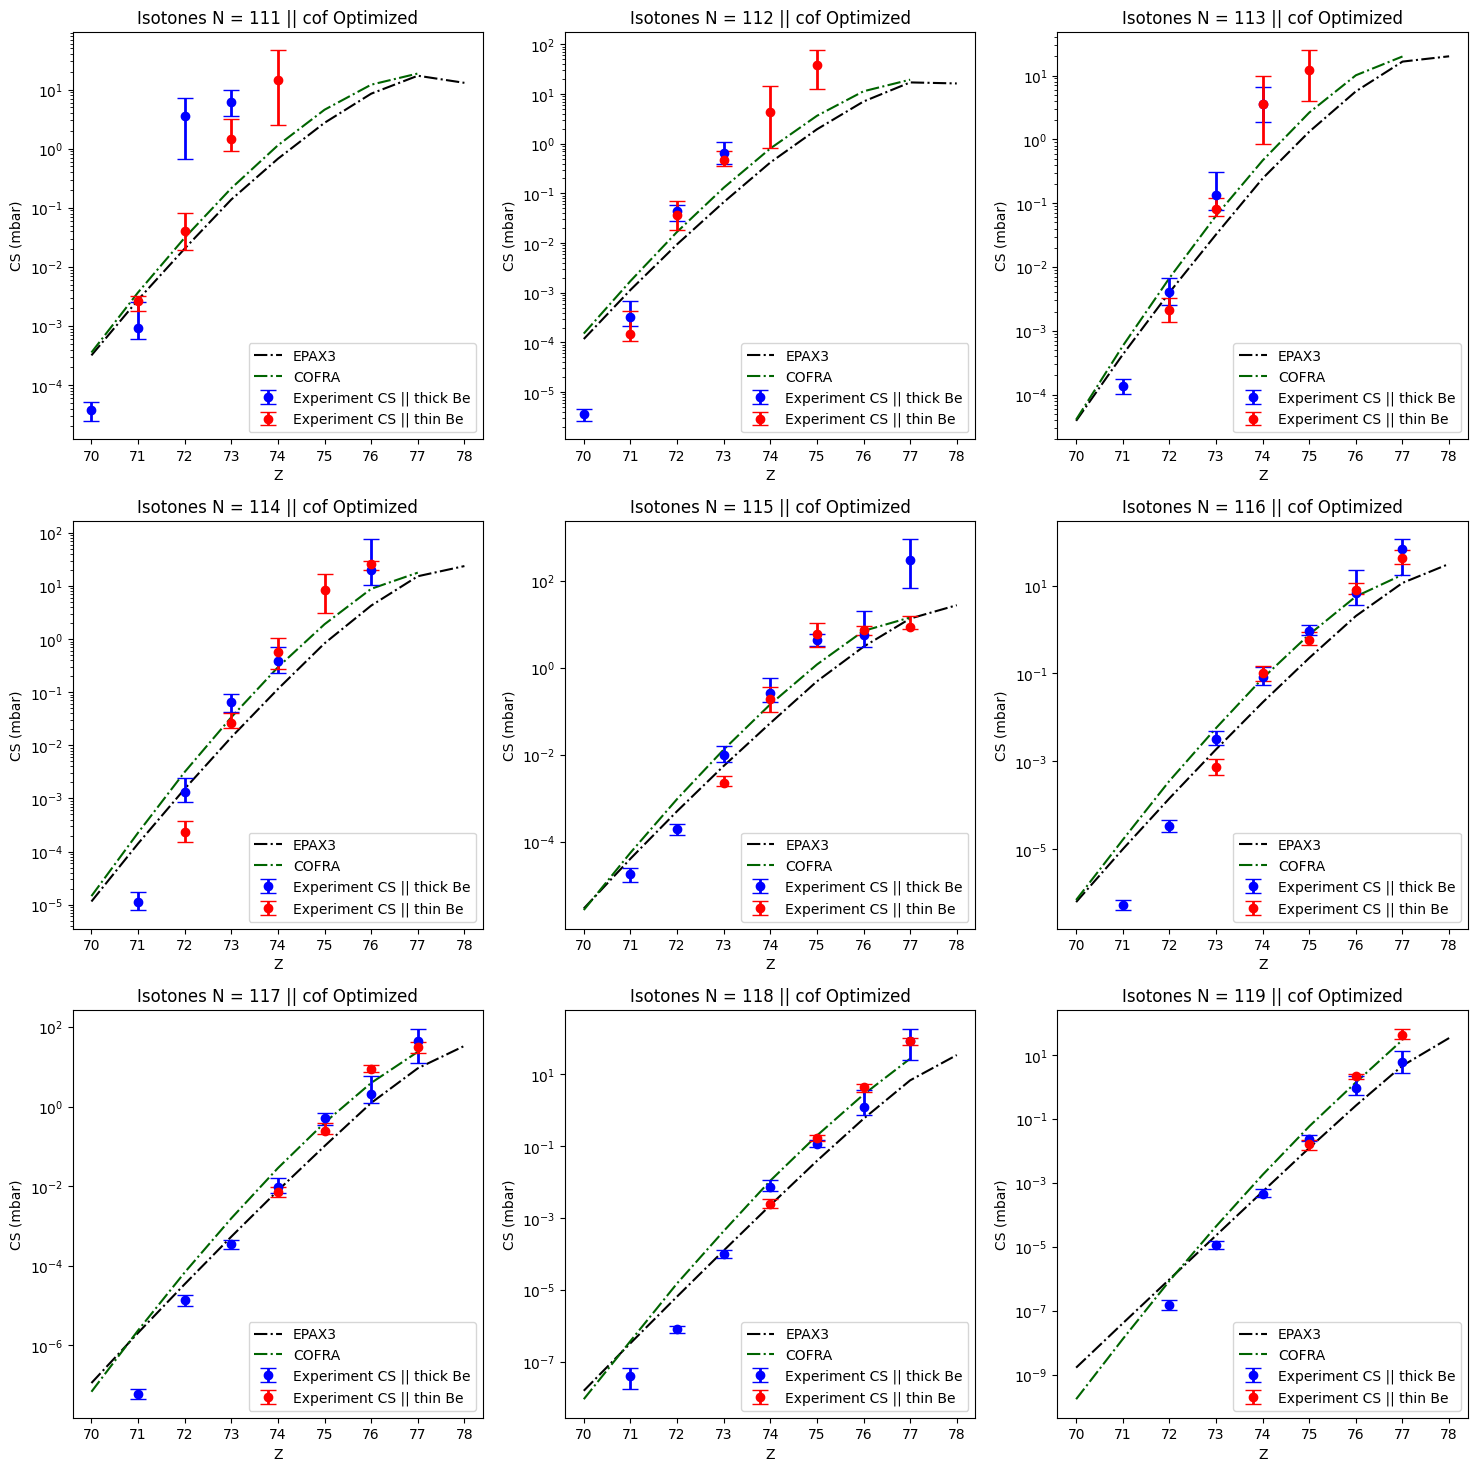

In [15]:
##### Final XS, thick vs thin, ISOTONES
PAX = False
COF = False
SHIFT = False

col = ['blue','red']

k=1
plt.figure(figsize=(18,18))
for N in np.arange(111,120,1):
    plt.subplot(3,3,k)
    EPAX3 = pd.read_excel('XS/EPAX3_Be.xlsx',index_col=0)
    COFRA = pd.read_excel('XS/COFRA.xlsx',index_col=0)
    # BOK = pd.read_excel('XS/BOK.xlsx',index_col=0)
    e3 = np.diag(EPAX3.loc[(70+N):(78+N)])
    # bk = np.diag(BOK.loc[(70+N):(78+N)])
    cf = np.diag(COFRA.loc[(70+N):(77+N)])
    plt.plot(list(EPAX3.columns),list(e3),label=f'EPAX3',linestyle='dashdot',color='black')
    # plt.plot(list(BOK.columns),list(bk),label=f'BOK',linestyle='dashdot',color='orange')
    plt.plot(list(COFRA.columns),list(cf),label=f'COFRA',linestyle='dashdot',color='darkgreen')

    i=0
    for dset in [TKfin,TNfin]:
        data = dset[dset['N'] == N]
        df = pd.concat(lin2log(data['CS'],data['CS-'],data['CS+']),axis=1)
        df.columns=['CS','Err-','Err+']
        # avgErr = round(df[['Err-','Err+']].sum().sum()/df.shape[0],3)

        plt.errorbar(data['Z'],data['CS'],np.array(data[['CS-','CS+']].T),
                     fmt='o', linewidth=2, capsize=6, color=col[i], label=f"Experiment CS || {dset.name} Be")
        i+=1


    plt.yscale('log')
    # plt.ylim(top=data['CS'].max()*10,bottom=data['CS'].min()*.1)
    # plt.xlim(right=data['A'].max()+.5,left=data['A'].min()-.5)

    plt.legend(loc='lower right')

    plt.title(f'Isotones N = {N} || {mod} Optimized')
    plt.xlabel('Z')
    plt.ylabel('CS (mbar)')

    # plotXS(TNfin,Z,f'None',color='red')
    # plotXS(TKfin,Z,f'Thick (Blue) vs Thin (Red) || Z = {int(Z)}',color='blue')
    k+=1
    
# plt.savefig(f'{mod}opt_isotones_{version}.png')

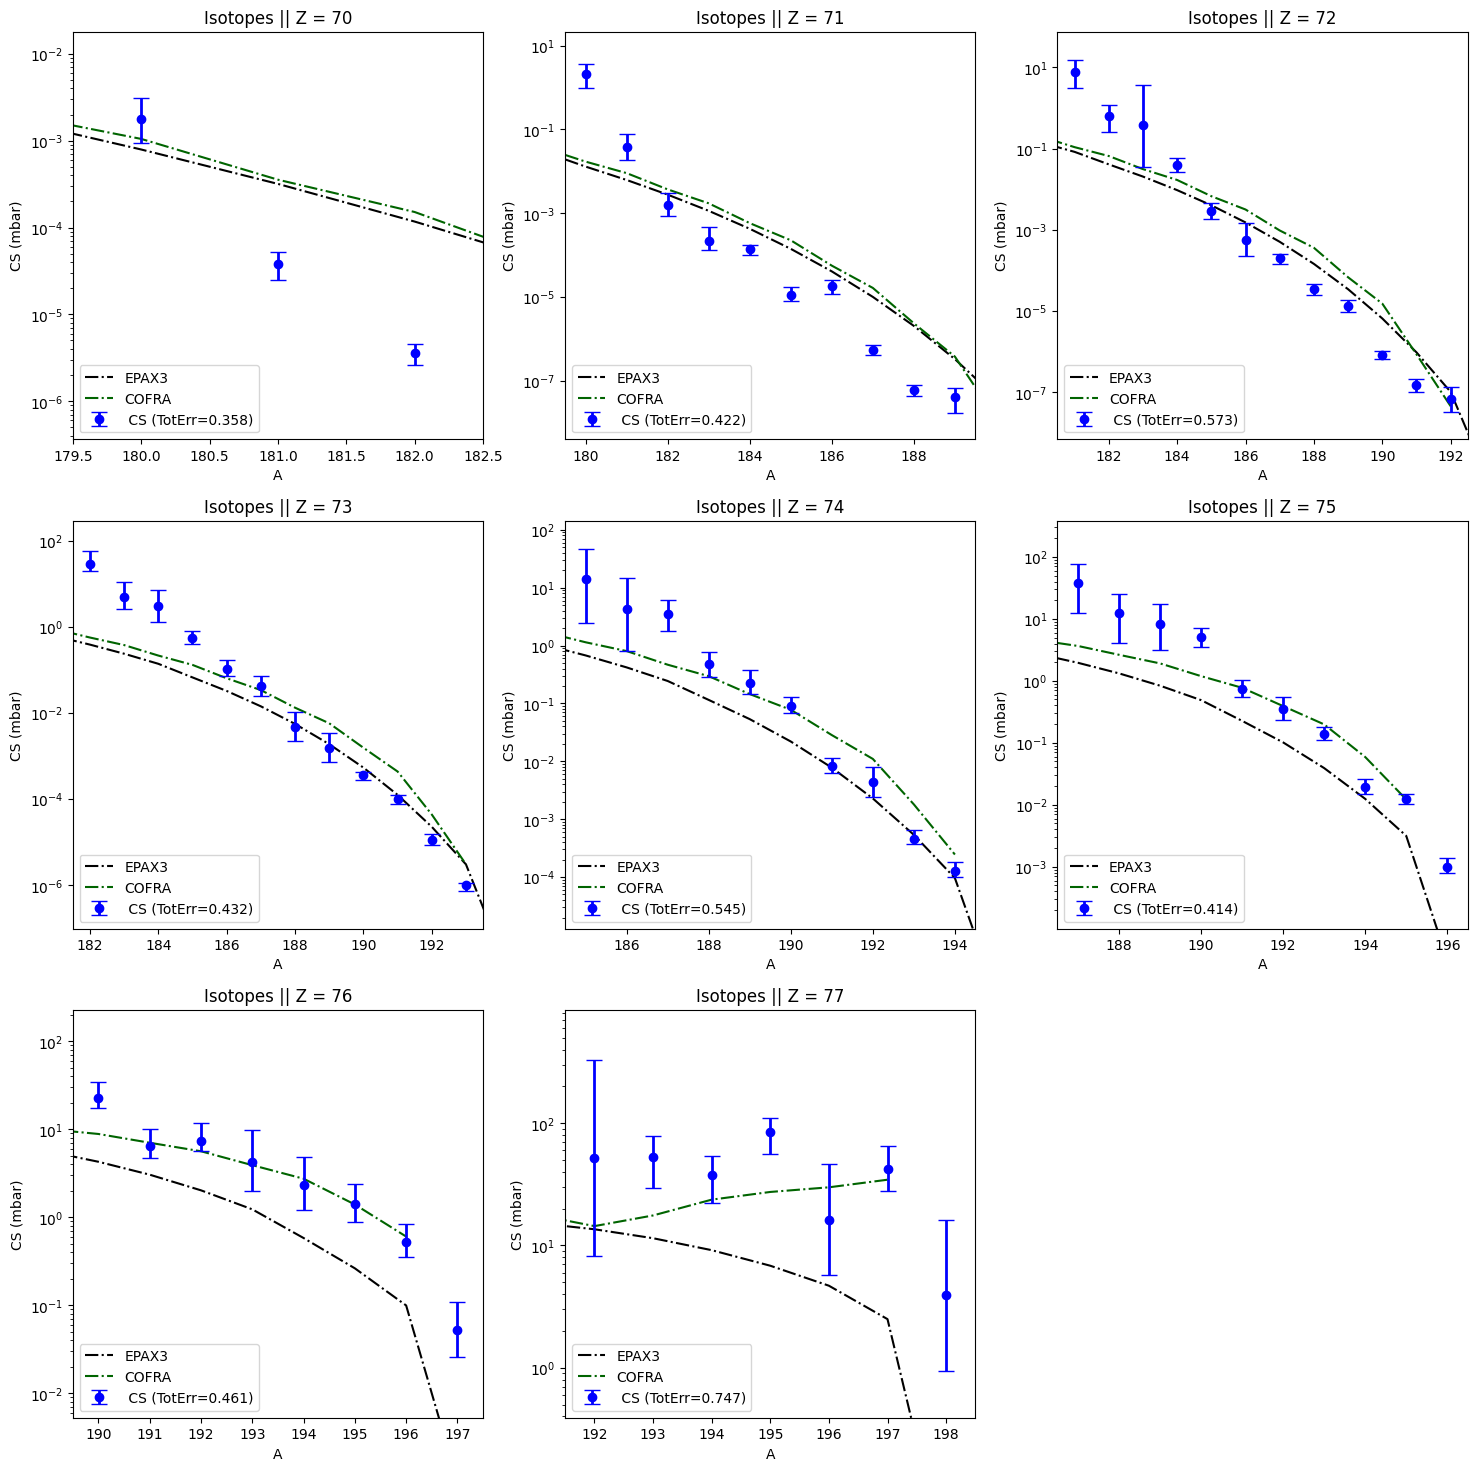

In [16]:
### Final XS ###

finfin = pd.DataFrame(columns=['Z','A','N','CS','CS-','CS+'])

temp = pd.concat([TNfin,TKfin])
temp['Wt'] = 1
for i in sorted(set(temp.index)):
    group = temp.loc[i]
    if isinstance(group,pd.core.frame.DataFrame):
        res = errAvg(group,err='lytc')
        CS = pd.DataFrame(res[:3],index=['CS','CS-','CS+'],columns=[i]).T #Labeling and formatting
        row = pd.concat([group[['Z','A','N']][:1],CS],axis=1)    #Including data for plotting
    else:
        row = group[['Z','A','N','CS','CS-','CS+']]
        row = row.to_frame().T
    finfin = pd.concat([finfin,row])

PAX = False
COF = False
SHIFT = False
LINE = False

#Isotopes Plots

k=1
plt.figure(figsize=(18,18))
for Z in sorted(set(finfin['Z'])):
    plt.subplot(3,3,k)
    EPAX3 = pd.read_excel('XS/EPAX3_Be.xlsx',index_col=0)
    e3 = EPAX3[int(Z)]
    plt.plot(e3.index,list(e3),label=f'EPAX3',linestyle='dashdot',color='black')
    if Z != 78:
        COFRA = pd.read_excel('XS/COFRA.xlsx',index_col=0)
        cf = COFRA[int(Z)]
        cf = cf.loc[:(120+Z)] #Cofra doesn't do pickup reactions, its only fragmentation
        plt.plot(cf.index,list(cf),label=f'COFRA',linestyle='dashdot',color='darkgreen')
    
    plotXS(finfin,Z,f'Isotopes || Z = {int(Z)}',color='blue')
    k+=1
    
# plt.savefig(f'{mod}opt_isotopes_{version}.png')

112
113
114
115
116
117
118
119
120


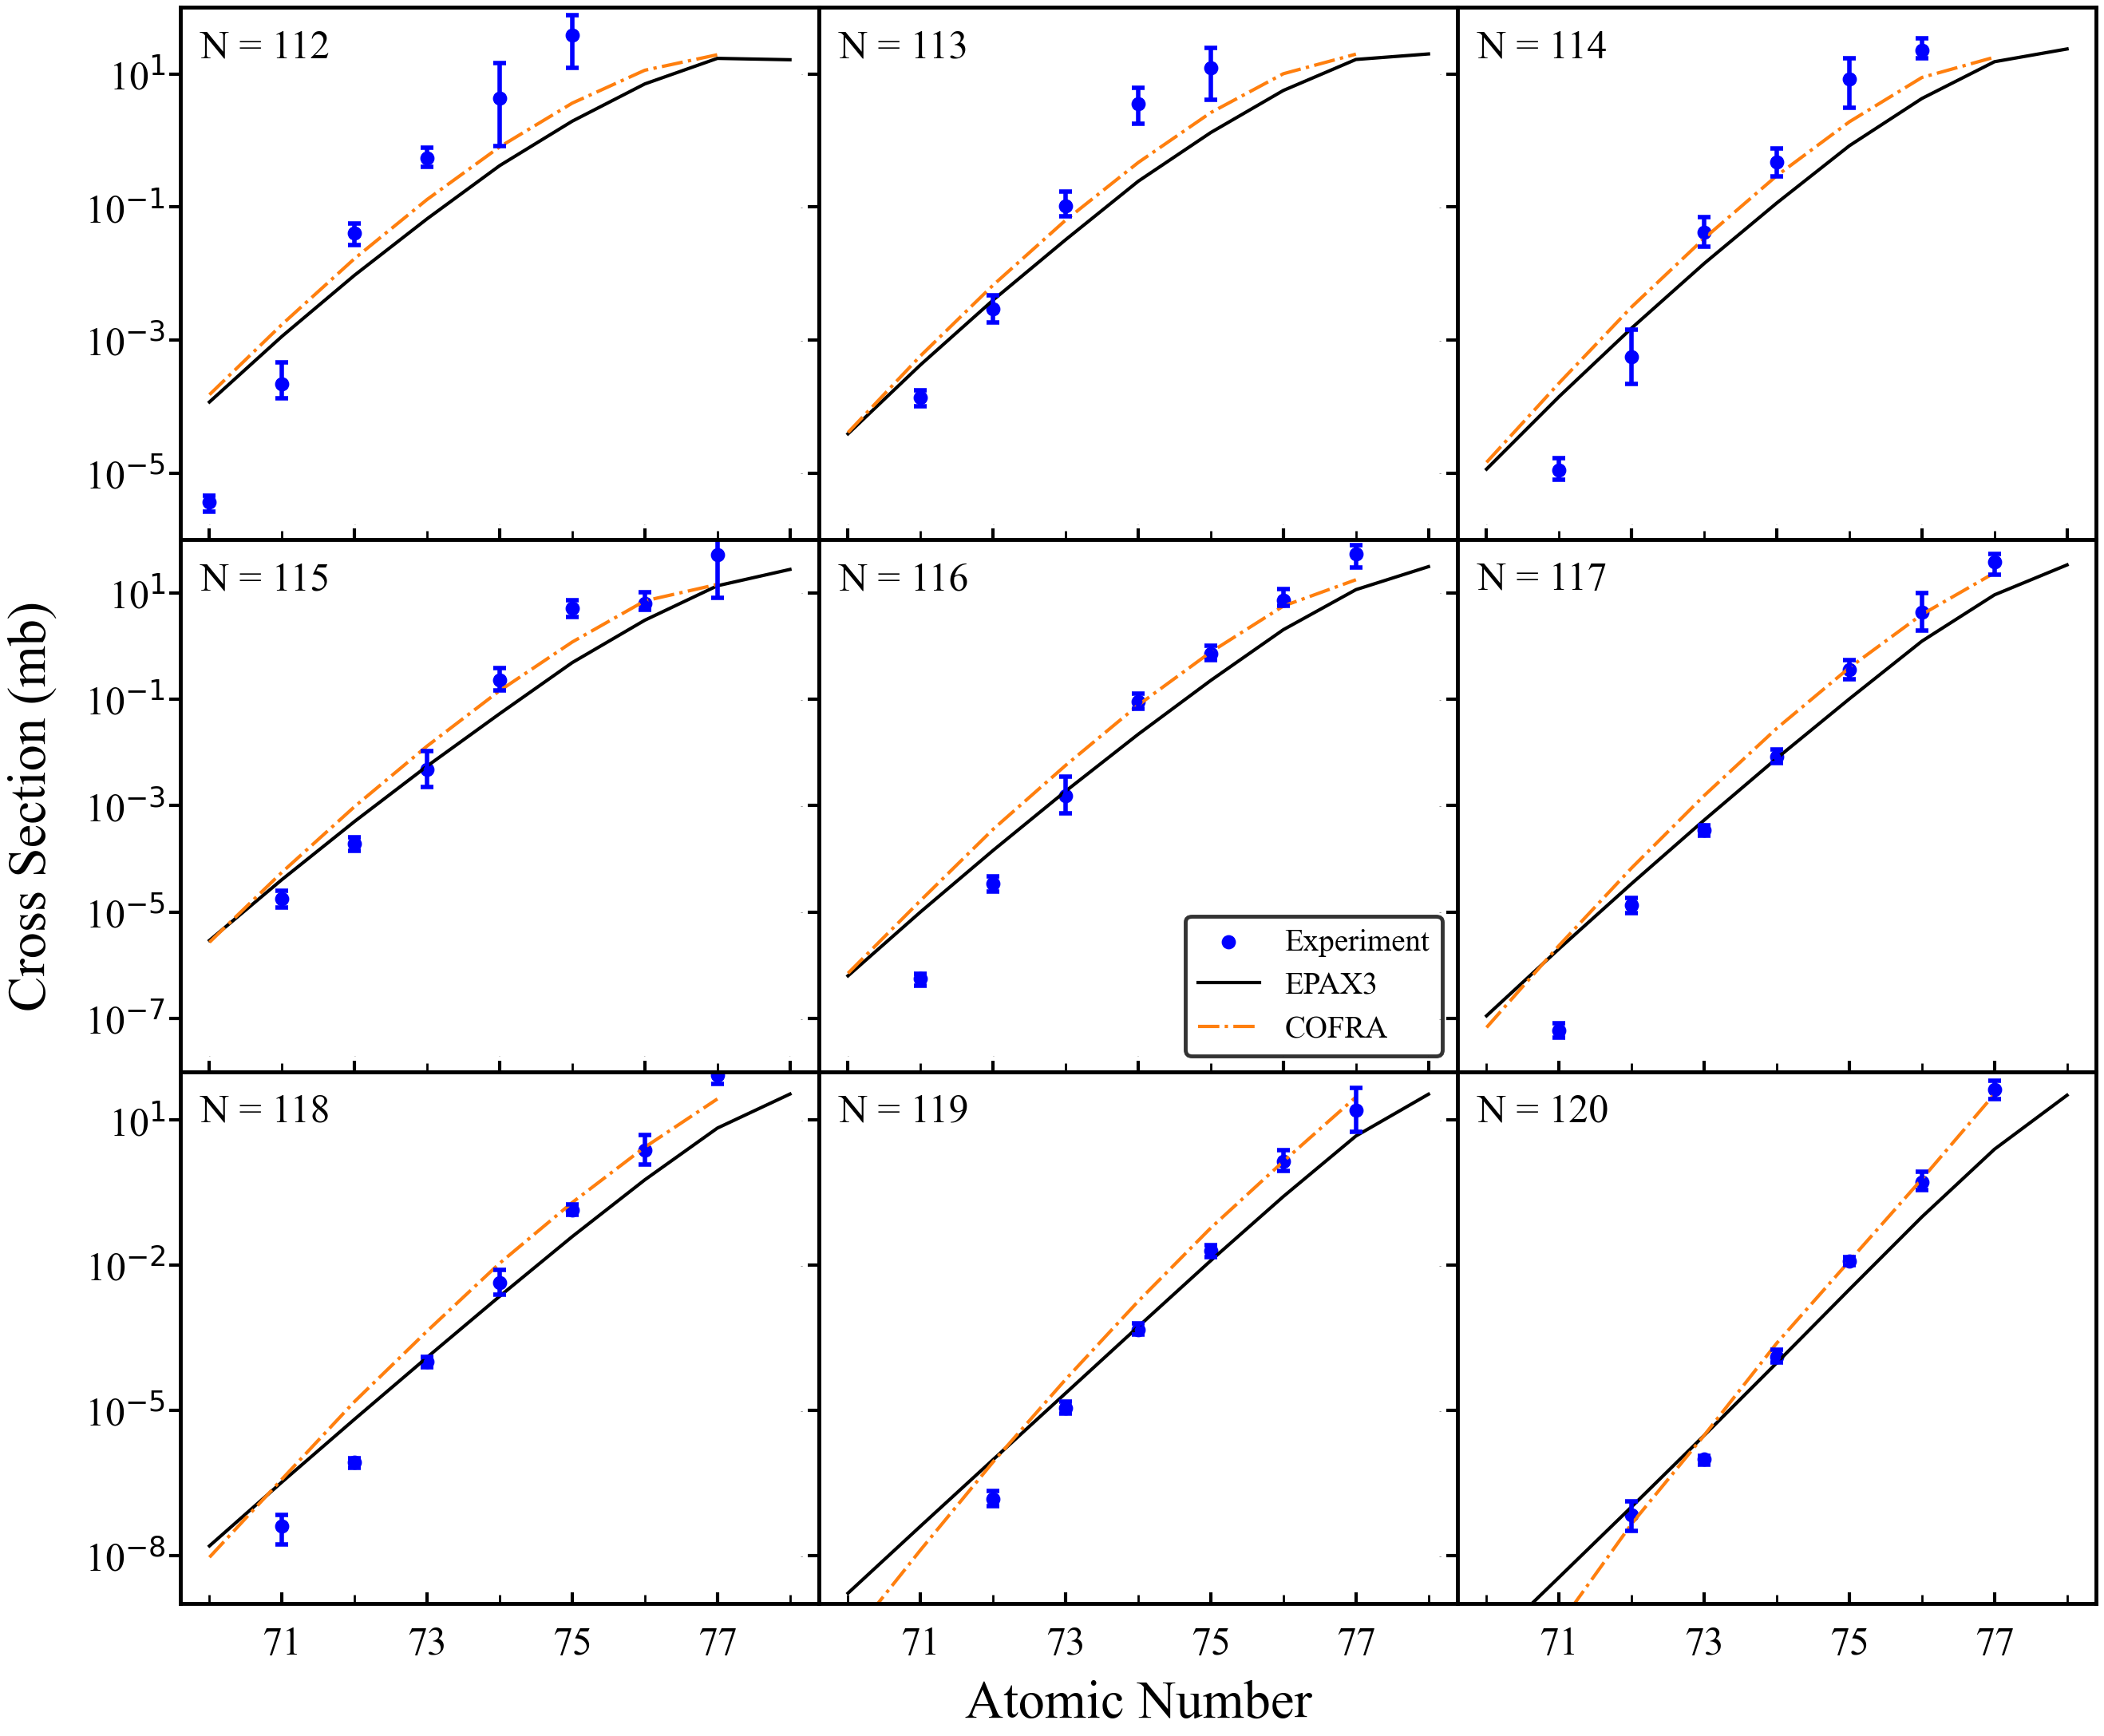

In [17]:
##### Final XS, All Averaged, ISOTONES
    
#Isotones for thick target experimental XS
PAX = False
COF = False
SHIFT = False

sml = 28
med = 36
big = 48

# plt.rc('text', usetex=True)
# plt.rcParams['text.latex.preamble'] = [r'\boldmath']

k=1
plt.figure(figsize=(30,25))
plt.rc('font', size=sml)          # controls default text sizes
plt.rc('axes', titlesize=med)     # fontsize of the axes title
plt.rc('axes', labelsize=big)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=0)    # fontsize of the tick labels
plt.rc('ytick', labelsize=med)    # fontsize of the tick labels
plt.rc('legend', fontsize=sml)    # legend fontsize
# plt.rc('font', weight='normal')
# plt.rcParams['axes.titley'] = 1.0    # y is in axes-relative coordinates.
plt.rcParams['axes.titlepad'] = -55  # pad is in points...
plt.rcParams["font.family"] = "Times New Roman"
mpl.rcParams['xtick.major.size'] = 10
mpl.rcParams['xtick.major.width'] = 3
mpl.rcParams['ytick.major.size'] = 10
mpl.rcParams['ytick.major.width'] = 3

mpl.rcParams['xtick.minor.size'] = 8
mpl.rcParams['xtick.minor.width'] = 2
mpl.rcParams['ytick.minor.size'] = 0
mpl.rcParams['ytick.minor.width'] = 2

ticks_font = mpl.font_manager.FontProperties(family='Arial', style='normal',
    size=med, weight='normal', stretch='normal')

for N in np.arange(112,121,1):
    print(N)
#     plt.subplot(3,3,k)
    ax = plt.subplot(3,3,k)
    for axis in ['top', 'bottom', 'left', 'right']:
        ax.spines[axis].set_linewidth(3.5)  # change width
        ax.spines[axis].set_color('black')    # change color
    ml = MultipleLocator(1)
    ax.xaxis.set_minor_locator(ml)
    plt.tick_params(axis="x",direction="in", pad=-15)
    plt.tick_params(axis="x",which='minor',direction="in", pad=-15)
    
    if k >= 6:
        plt.tick_params(axis="x",direction="in", pad=20)
        plt.rc('xtick', labelsize=med)    # fontsize of the tick labels
        plt.xticks(ticks=[71,73,75,77],labels=['71','73','75','77'])

        
    if k == 3 or k == 6:
        plt.rc('ytick', labelsize=med)    # fontsize of the tick labels
    else:
        plt.rc('ytick', labelsize=0)
        
    ######## Models ########
    EPAX3 = pd.read_excel('XS/EPAX3_Be.xlsx',index_col=0)
    COFRA = pd.read_excel('XS/COFRA.xlsx',index_col=0)
    e3 = np.diag(EPAX3.loc[(70+N):(78+N)])
    cf = np.diag(COFRA.loc[(70+N):(77+N)])
    plt.plot(list(EPAX3.columns),list(e3),label=f'EPAX3',linestyle='solid',color='black',linewidth=3)
    plt.plot(list(COFRA.columns),list(cf),label=f'COFRA',linestyle='dashdot',color='C1',linewidth=3)
    ########################
    
    ######## Point Data ########
    data = finfin[finfin['N'] == N]
    plt.scatter(data['Z'],data['CS'], marker='o', color='blue', label=f"Experiment", s = 140)
    ################################
    if k == 5:
        order = [2,0,1]
        handles, labels = plt.gca().get_legend_handles_labels()
        leg = plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order],loc='lower right')
        leg.get_frame().set_linewidth(3.5)
        leg.get_frame().set_edgecolor('black')
    
    ######## ErrBar Data ########
    df = pd.concat(lin2log(data['CS'].astype(float),data['CS-'].astype(float),data['CS+'].astype(float)),axis=1)
    df.columns=['CS','Err-','Err+']

    (_, caps, _) = plt.errorbar(data['Z'],data['CS'],np.array(data[['CS-','CS+']].T),fmt='o',
                                linewidth=4, capsize=6, color='blue')
    for c in caps:
        c.set_color('blue')
        c.set_markeredgewidth('4')
    ################################

    plt.yscale('log')

    #Shared Axis
    if k <= 3:
        plt.ylim(top=100,bottom=1e-6)
        plt.yticks(ticks=[1e-5,1e-3,0.1,10],labels=['10$^{-5}$','10$^{-3}$','10$^{-1}$','10$^{1}$'])
#         plt.xlim(right=data['A'].max()+.5,left=data['A'].min()-.5)
    elif k>3 and k<=6:
        plt.ylim(top=100,bottom=1e-8)
        plt.yticks(ticks=[1e-7,1e-5,1e-3,.1,10],labels=['10$^{-7}$','10$^{-5}$','10$^{-3}$','10$^{-1}$','10$^{1}$'])
#         plt.xlim(right=data['A'].max()+.5,left=data['A'].min()-.5)
    elif k>6:
        plt.ylim(top=100,bottom=1e-9)
        plt.yticks(ticks=[1e-8,1e-5,.01,10],labels=['10$^{-8}$','10$^{-5}$','10$^{-2}$','10$^{1}$'])
#         for label in ax.get_yticklabels():
#             label.set_fontproperties(ticks_font)
#         plt.xlim(right=data['A'].max()+.5,left=data['A'].min()-.5)

    if k == 4:
        plt.ylabel('Cross Section (mb)',labelpad=25)
    if k == 8:
        plt.xlabel('Atomic Number',labelpad=15)

    ax.set_title(f'  N = {N}',loc='left',y=1.0,pad=-45)
#     if k < 9:
#         plt.title(f'  N = {N}',loc='left')
#     else:
#         plt.title(f'  N = {N} (Pick-up)',loc='left') ###For showing N=121!!!###
    
#     plt.xlabel('Z')
#     plt.ylabel('CS (mbar)')
    

#     plt.rc('figure', titlesize=big)  # fontsize of the figure title
    

    # plotXS(TNfin,Z,f'None',color='red')
    # plotXS(TKfin,Z,f'Thick (Blue) vs Thin (Red) || Z = {int(Z)}',color='blue')
    k+=1


plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0,
                    hspace=0)
plt.savefig(f'XSfin.png',bbox_inches='tight')

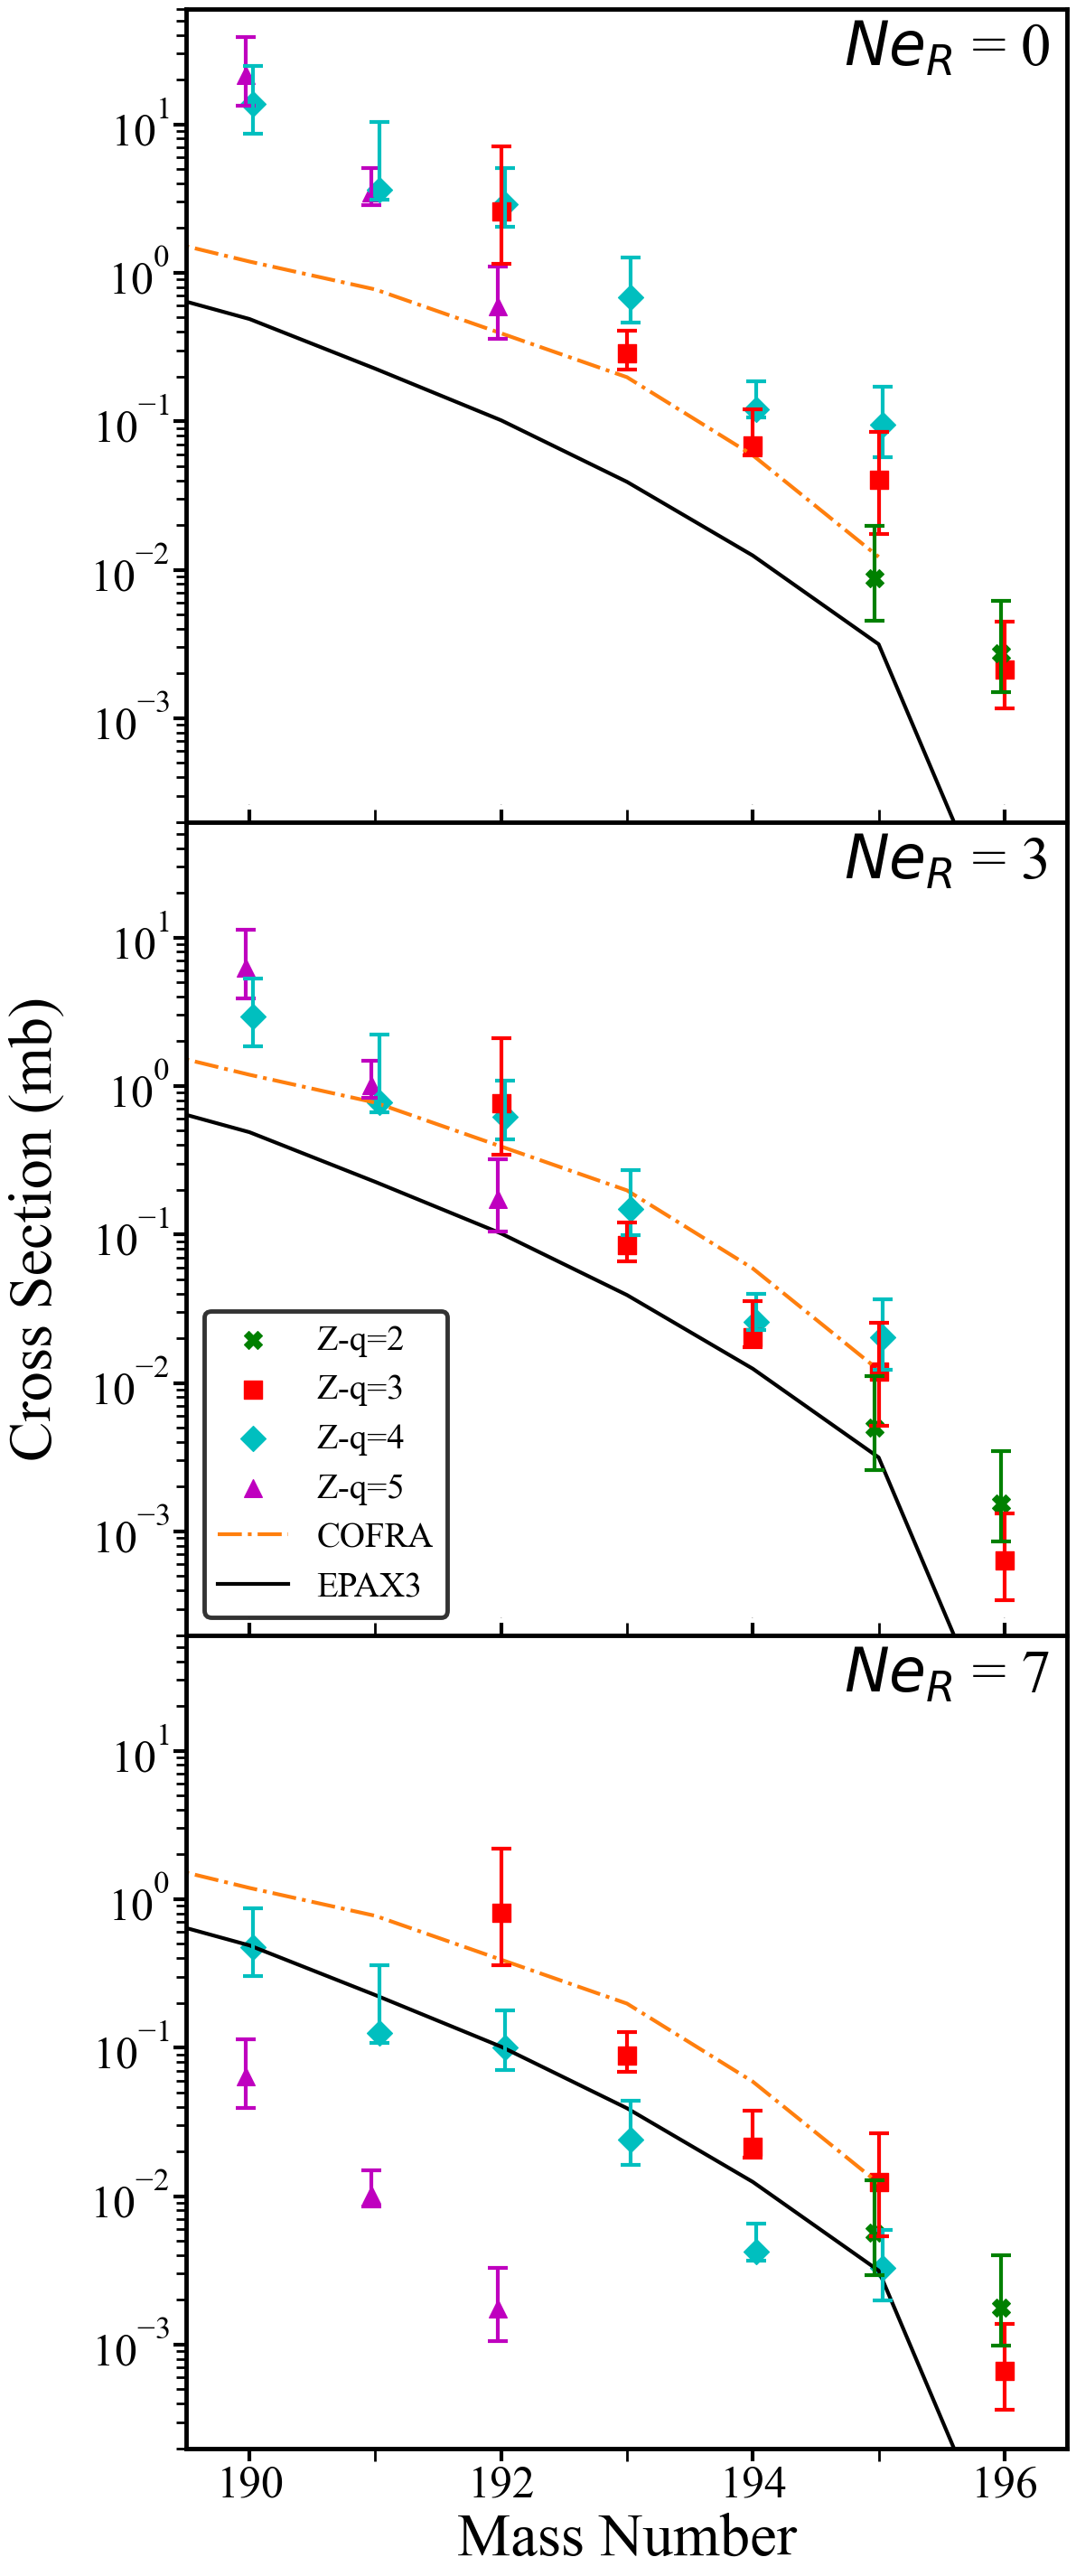

In [18]:
def qwikP(df,name):
    colors = {1:'b',2:'g',3:'r',4:'c',5:'m',6:'y',7:'k'}
    shift = {2:-.03,3:0,4:.03,5:-.03}
    mark = {2:'X',3:'s',4:'D',5:'^'}
    
    ############ Models ###########
    Z = df['Z'].iloc[0]
    EPAX3 = pd.read_excel('XS/EPAX3_Be.xlsx',index_col=0)
    e3 = EPAX3[int(Z)]

    COFRA = pd.read_excel('XS/COFRA.xlsx',index_col=0)
    cf = COFRA[int(Z)]
    cf = cf.loc[:(120+Z)]
    
    plt.plot(cf.index,list(cf),label=f'COFRA',linestyle='dashdot',color='C1',linewidth=3)
    plt.plot(e3.index,list(e3),label=f'EPAX3',linestyle='solid',color='black',linewidth=3)
    #################################
    
    ############ Point Data ###########
    for q in sorted(set(df['q'])):
        qset = df[df['q'] == q]
        zmq = qset['Z-q'].iloc[0]
        plt.scatter(qset['A']+shift[zmq],qset['CS'],label=f"Z-q={int(zmq)}",s=200,marker=mark[zmq],color=colors[zmq])
    #################################
    
    if LEGEND:
        order = [5,4,3,2,0,1]
        handles, labels = plt.gca().get_legend_handles_labels()
        leg = plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order],loc='lower left')
        leg.get_frame().set_linewidth(3.5)
        leg.get_frame().set_edgecolor('black')
    
    ############ ErrBar Data ###########
    for q in sorted(set(df['q'])):
        qset = df[df['q'] == q]
        zmq = qset['Z-q'].iloc[0]

        (_, caps, _) = plt.errorbar(qset['A']+shift[zmq],qset['CS'],np.array(qset[['CS-','CS+']].T),
                                    fmt='o', label=f"Z-q={int(zmq)}", markersize=0, linewidth=3, capsize=8,
                                    color=colors[zmq]) #, marker=mark[zmq] uneccessary argument, marker already set
        for cap in caps:
            cap.set_color(colors[zmq])
            cap.set_markeredgewidth(3)
    #################################
    
    plt.title(name+'  ',loc='right',y=1.0,pad=-45)

    top = df['CS'].max()*10
    bot = df['CS'].min()*.1
    plt.ylim(top=6e1,bottom=2e-4)
    plt.xlim(right=df['A'].max()+.5,left=df['A'].min()-.5)
    plt.yscale('log')

######### Pre-Initizaliation #########
Z = 75
qf0 = xsQF_Avg[0]
qf3 = xsQF_Avg[3]
qf7 = xsQF_Avg[7]

# Font Sizes
sml = 28
med = 36
big = 48
#############################################

######### Initialization #########
plt.figure(figsize=(15,30))
plt.rc('font', size=sml)          # controls default text sizes
plt.rc('axes', titlesize=big)     # fontsize of the axes title
plt.rc('axes', labelsize=big)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=0)    # fontsize of the tick labels
plt.rc('ytick', labelsize=med)    # fontsize of the tick labels
plt.rc('legend', fontsize=sml)    # legend fontsize

mpl.rcParams['xtick.major.size'] = 10
mpl.rcParams['xtick.major.width'] = 3
mpl.rcParams['ytick.major.size'] = 10
mpl.rcParams['ytick.major.width'] = 3

mpl.rcParams['xtick.minor.size'] = 10
mpl.rcParams['xtick.minor.width'] = 2
mpl.rcParams['ytick.minor.size'] = 8
mpl.rcParams['ytick.minor.width'] = 2

plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['axes.titlepad'] = -55  # pad is in points...
######################################################


######### Plot 1 #########
LEGEND = False
ax = plt.subplot(3,1,1)
for axis in ['top', 'bottom', 'left', 'right']:
    ax.spines[axis].set_linewidth(3.5)  # change width
    ax.spines[axis].set_color('black')    # change color


qwikP(qf0[(qf0['Dset'] == 'thick') & (qf0['Z'] == 75)],'$Ne_R$ = 0')
ml = MultipleLocator(1)
ax.xaxis.set_minor_locator(ml)
plt.tick_params(axis="x",direction="in", pad=-15)
plt.tick_params(axis="x",which='minor',direction="in", pad=-15)
###########################

######### PLot 2 #########
LEGEND = True
ax2 = plt.subplot(3,1,2)
for axis in ['top', 'bottom', 'left', 'right']:
    ax2.spines[axis].set_linewidth(3.5)  # change width
    ax2.spines[axis].set_color('black')    # change color


qwikP(qf3[(qf3['Dset'] == 'thick') & (qf3['Z'] == 75)],'$Ne_R$ = 3')
ml = MultipleLocator(1)
ax2.xaxis.set_minor_locator(ml)
plt.tick_params(axis="x",direction="in", pad=-15)
plt.tick_params(axis="x",which='minor',direction="in", pad=-15)

# Single Y label
plt.ylabel('Cross Section (mb)',labelpad=20)
###########################

######### Plot 3 #########
LEGEND = False
plt.rc('xtick', labelsize=med)
ax3 = plt.subplot(3,1,3)
for axis in ['top', 'bottom', 'left', 'right']:
    ax3.spines[axis].set_linewidth(3.5)  # change width
    ax3.spines[axis].set_color('black')    # change color

qwikP(qf7[(qf7['Dset'] == 'thick') & (qf7['Z'] == 75)],'$Ne_R$ = 7')
ml = MultipleLocator(1)
ax3.xaxis.set_minor_locator(ml)
# plt.tick_params(axis="x",direction="out", pad=0)

# Single X label
plt.xlabel('Mass Number')
###########################


plt.subplots_adjust(left=0.2,
                    bottom=0.05,
                    right=0.85,
                    top=0.95,
                    wspace=0,
                    hspace=0)

sty = 'png'
# plt.margins(5,5)
plt.savefig(f'qf_comp.{sty}',format=sty,bbox_inches='tight')

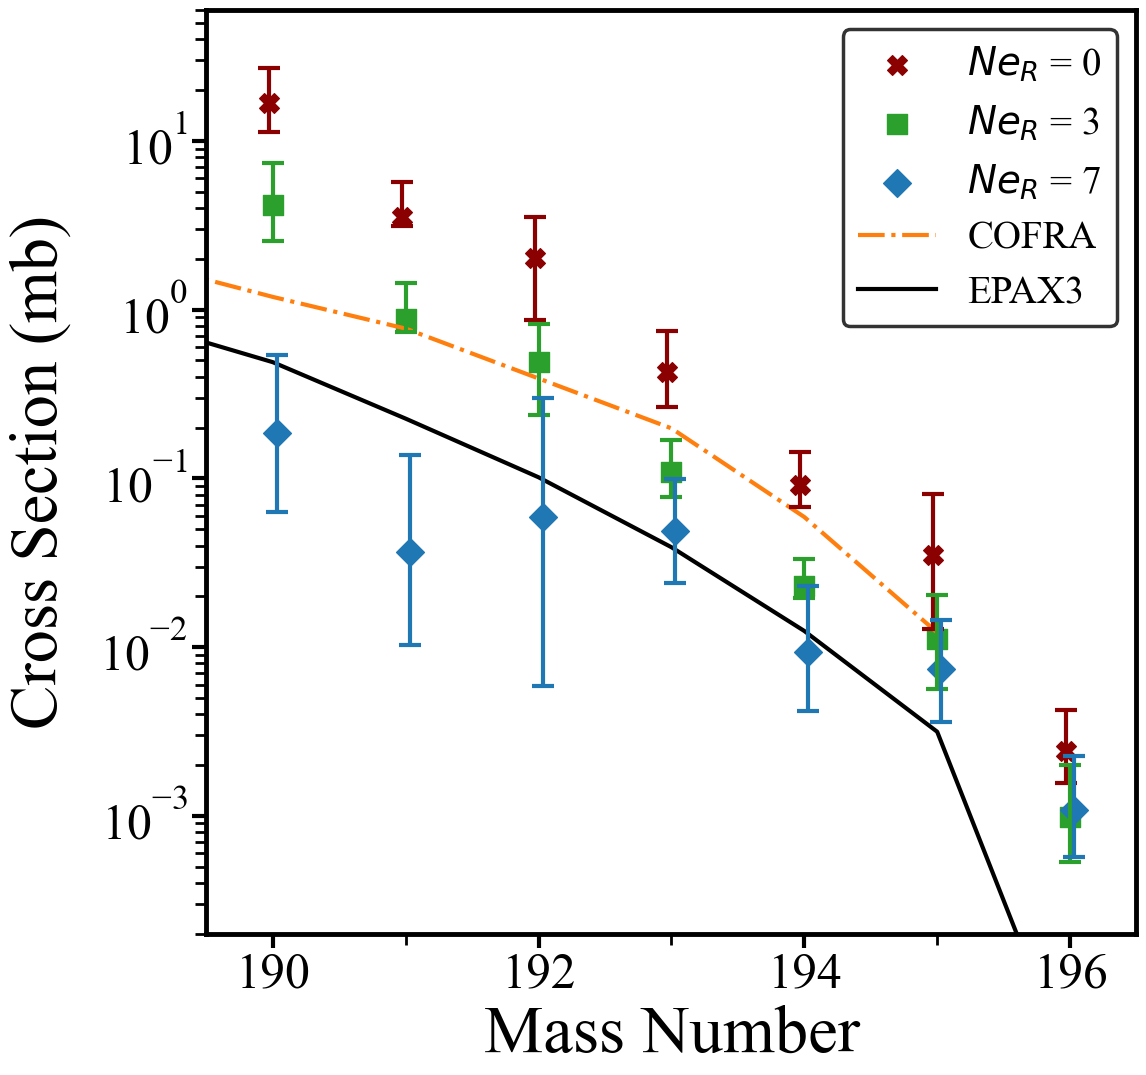

In [19]:
# from matplotlib.ticker import MultipleLocator
# import matplotlib.ticker as tck

### This is supposed to be the qfAvg plot for the paper. It stopped working.

# Pre-Initialization
Z = 75
mark = ['X','s','D']
shift = [-.03,0,.03]
colors = ['darkred','C2','C0']
Qs = [0,3,7]
TK = pd.concat([xsFin_All[q][xsFin_All[q]['Dset'] == 'thick'] for q in xsFin_All])
data = [TK[(TK['qF'] == q) & (TK['Z'] == Z)] for q in Qs]
for i,d in enumerate(data):
    d.name = f'$Ne_R$ = {Qs[i]}'

Xmin = int(data[0]['A'].min())
Xmax = int(data[0]['A'].max())

# Font Sizes
sml = 28
med = 36
big = 48

# Initialization
plt.figure(figsize=(12,12))

plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['axes.titlepad'] = -55  # pad is in points...

plt.rc('font', size=sml)          # controls default text sizes
plt.rc('axes', titlesize=big)     # fontsize of the axes title
plt.rc('axes', labelsize=big)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=med)    # fontsize of the tick labels
plt.rc('ytick', labelsize=med)    # fontsize of the tick labels
plt.rc('legend', fontsize=sml)    # legend fontsize

mpl.rcParams['xtick.major.size'] = 10
mpl.rcParams['xtick.major.width'] = 3
mpl.rcParams['ytick.major.size'] = 10
mpl.rcParams['ytick.major.width'] = 3

mpl.rcParams['xtick.minor.size'] = 8
mpl.rcParams['xtick.minor.width'] = 2
mpl.rcParams['ytick.minor.size'] = 8
mpl.rcParams['ytick.minor.width'] = 2

ax = plt.subplot(1,1,1)
for axis in ['top', 'bottom', 'left', 'right']:
    ax.spines[axis].set_linewidth(3.5)  # change width
    ax.spines[axis].set_color('black')    # change color

############ Models ###########
EPAX3 = pd.read_excel('XS/EPAX3_Be.xlsx',index_col=0)
e3 = EPAX3[int(Z)]

COFRA = pd.read_excel('XS/COFRA.xlsx',index_col=0)
cf = COFRA[int(Z)]
cf = cf.loc[:(120+Z)]

plt.plot(cf.index,list(cf),label=f'COFRA',linestyle='dashdot',color='C1',linewidth=3)
plt.plot(e3.index,list(e3),label=f'EPAX3',linestyle='solid',color='black',linewidth=3)
################################

############ Data ##############
for i,df in enumerate(data):
    plt.scatter(df['A']+shift[i],df['CS'],label=df.name,s=200,marker=mark[i],color=colors[i])

order = [2,3,4,0,1]
handles, labels = plt.gca().get_legend_handles_labels()
leg = plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order],loc='upper right')
leg.get_frame().set_linewidth(2.5)
leg.get_frame().set_edgecolor('black')

# ax.xaxis.set_minor_locator(tck.AutoMinorLocator())
# print(tck.AutoMinorLocator().__call__())

for i,df in enumerate(data):
    (_, caps, _) = plt.errorbar(df['A']+shift[i],df['CS'],np.array(df[['CS-','CS+']].T),
                                fmt='o', color=colors[i], markersize=0, linewidth=3, capsize=8)
    for cap in caps:
        cap.set_markeredgewidth(3)
################################

### Post Formatting ###
plt.ylim(top=6e1,bottom=2e-4)
plt.xlim(right=df['A'].max()+.5,left=df['A'].min()-.5)
plt.yscale('log')
plt.ylabel('Cross Section (mb)',labelpad=20)
plt.xlabel('Mass Number')

ax.set_xticks(np.arange(Xmin,Xmax,1), minor=True)

# ml = MultipleLocator(1)
# plt.axes().xaxis.set_minor_locator(ml)
# ax.xaxis.set_minor_locator(ml)
# print(ml.__call__())
################################

sty = 'png'
plt.margins(10.1)
plt.savefig(f'qf_comp_Avg.{sty}',format=sty,bbox_inches='tight')

In [ ]:
####################################################################
### ~~~~~~~~~~~~~~~ Extract Final Cross Section (With Charge States Visible) ~~~~~~~~~~~~~~~~ ###
####################################################################

#If you want to use this. Run this in replacement of the Extraction cell way up above
#Then run the corresponding plotter cell.

mod = 'cof' #For reading in qF PDFs

#noQF67!!!
version = 'v2' #(norm,chi,err) --- v1:(1,1,10) --- v2(1,1,1) opt str(1,2)=(6,18) --- v3(1,1,1)

TK = pd.concat([xsQF_Avg[q][xsQF_Avg[q]['Dset'] == 'thick'] for q in xsQF_Avg])
TK = TK[TK['Z'] != 78]
TK = TK[(TK['qF'] != 6) & (TK['qF'] != 7)]
TN = pd.concat([xsQF_Avg[q][xsQF_Avg[q]['Dset'] == 'thin'] for q in xsQF_Avg])
TN = TN[TN['Z'] != 78]
TN = TN[(TN['qF'] != 6) & (TN['qF'] != 7)] #Technically not necessary, Wts for qf,Z pair that don't exist default to 0


qPDF_TN = pd.read_excel(f'QW{mod}.xlsx',sheet_name=f'thin_{version}',index_col=0)
qPDF_TK = pd.read_excel(f'QW{mod}.xlsx',sheet_name=f'thick_{version}',index_col=0)

# @@@@@@ ~~~~ @@@@@@ #

for Z in qPDF_TN.index:
    qfs = qPDF_TN.loc[Z]
    # for q in qfs.index:
    #     TN['ind'] = TN.index.copy() #Save old index
    #     TN.index = TN.index*10 + TN['qF'] #Expand Index w/ numerics
    #     inds = TN[(TN['qF']==q) & (TN['Z'] == Z)].index #Extract index location from filtered slice
    #     TN.loc[inds,'Wt'] = qfs[q] #Assign values to weight column with index pointers
    #     TN.index = (TN.index - TN['qF'])/10 #Collapse Index w/ numerics
    #     TN['ind'] = TN.index; TN.index = TN.index.astype(int) #Reassign old index and convert type
    for q in qfs.index:
        Kligus = TN
        TN.index = TN.index.astype(object)
        TN['Wt'][(TN['qF']==q) & (TN['Z'] == Z)] = qfs[q]

TNfin = pd.DataFrame(columns=['Dset','Z','A','CS','CS-','CS+'])
for i in sorted(set(TN.index)):
    group = TN.loc[i]
    res = errAvg(group,err='lytc',wt='cust')
    CS = pd.DataFrame(res[:3],index=['CS','CS-','CS+'],columns=[i]).T #Labeling and formatting
    row = pd.concat([group[['Dset','Z','A']][:1],CS],axis=1)    #Including data for plotting
    TNfin = pd.concat([TNfin,row])

# ~~~~
        
for Z in qPDF_TK.index:
    qfs = qPDF_TK.loc[Z]
    for q in qfs.index:
        TK['ind'] = TK.index.copy() #Save old index
        TK.index = TK.index*10 + TK['qF'] #Expand Index w/ numerics
        inds = TK[(TK['qF']==q) & (TK['Z'] == Z)].index #Extract index location from filtered slice
        TK.loc[inds,'Wt'] = qfs[q] #Assign values to weight column with index pointers
        TK.index = (TK.index - TK['qF'])/10 #Collapse Index w/ numerics
        TK['ind'] = TK.index; TK.index = TK.index.astype(int) #Reassign old index and convert type

TKfin = pd.DataFrame(columns=['Dset','Z','A','CS','CS-','CS+'])
for i in sorted(set(TK.index)):
    group = TK.loc[i]
    res = errAvg(group,err='lytc',wt='cust')
    CS = pd.DataFrame(res[:3],index=['CS','CS-','CS+'],columns=[i]).T #Labeling and formatting
    row = pd.concat([group[['Dset','Z','A']][:1],CS],axis=1)    #Including data for plotting
    TKfin = pd.concat([TKfin,row])

# @@@@@@ ~~~~ @@@@@@ #

#Add N for isotone plots
TKfin['N'] = TKfin['A']-TKfin['Z']
TKfin.name = 'thick'
TNfin['N'] = TNfin['A']-TNfin['Z']
TNfin.name = 'thin'

TKfin.loc[]